# Problem Statement :

A machine learning model is to be proposed to predict a house price based on data related to the house i.e. its area_type, availability, location, size, society, total_sqft, bath and balcony	

### Goals of the Study:

The main objectives of this case study are as follows:

1. To apply data preprocessing and preparation techniques in order to obtain clean data (EDA)
2. To build machine learning models able to predict house price based on house features
3. To analyze and compare models performance in order to choose the best model


#  Importing Required Libraries

In [236]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing the Data

In [237]:
# import data to data frame
data = pd.read_csv("C:/Users/PC/Documents/DA/Case Study/House Price Prediction Model/House_Data.csv")

In [238]:
# Top 10 records
data.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Plot Area,Ready To Move,Sarjapur Road,4 Bedroom,NaN,1,4.0,NaN,120.0
1,Built-up Area,Ready To Move,Srirampuram,7 BHK,NaN,5,7.0,3.0,115.0
2,Plot Area,18-Dec,Suragajakkanahalli,3 Bedroom,PrhyaK,11,3.0,2.0,74.0
3,Carpet Area,Ready To Move,Weavers Colony,1 BHK,NaN,15,1.0,0.0,30.0
4,Built-up Area,Ready To Move,Grihalakshmi Layout,5 Bedroom,NaN,24,2.0,2.0,150.0
5,Plot Area,Ready To Move,Mysore Road,1 Bedroom,NaN,45,1.0,0.0,23.0
6,Plot Area,19-Oct,Whitefield,4 Bedroom,NVaree,60,4.0,2.0,218.0
7,Super built-up Area,Ready To Move,Tilak Nagar,1 BHK,NaN,250,2.0,2.0,40.0
8,Plot Area,Ready To Move,Hennur Road,2 Bedroom,NaN,276,3.0,3.0,23.0
9,Super built-up Area,Ready To Move,Yelahanka New Town,1 BHK,KHatsFl,284,1.0,1.0,8.0


In [239]:
# Last 10 records
data.tail(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13310,Super built-up Area,Ready To Move,Rajapura,2 BHK,NaN,86.72Sq. Meter,2.0,2.0,40.000
13311,Super built-up Area,19-Jul,Sarjapur Road,2 BHK,Sasta S,870 - 1080,2.0,0.0,28.275
13312,Super built-up Area,18-Aug,Magadi Road,2 BHK,Vrenty,884 - 1116,2.0,0.0,46.500
13313,Super built-up Area,18-Oct,Electronic City Phase II,2 BHK,SRhtsa,888 - 1290,2.0,0.0,32.670
13314,Super built-up Area,Ready To Move,Hoskote,2 BHK,Soose P,929 - 1078,2.0,0.0,28.095
13315,Super built-up Area,18-Nov,Thanisandra,2 BHK,Bhe 2ko,934 - 1437,2.0,0.0,58.680
13316,Super built-up Area,18-May,Mysore Road,2 BHK,Brama P,942 - 1117,2.0,0.0,50.855
13317,Super built-up Area,Ready To Move,Hormavu,2 BHK,SKvanin,943 - 1220,2.0,0.0,38.665
13318,Super built-up Area,18-Jun,Mysore Road,2 BHK,Gopia O,980 - 1030,2.0,0.0,35.175
13319,Super built-up Area,20-Dec,Whitefield,2 BHK,Somns T,981 - 1249,2.0,0.0,34.555


# Create Necessary Function

## By IQR

In [240]:
# create function to check outlier 
def iqr_check_outliers(data, colm):
    q1 = data[colm].quantile(0.25)
    q3 = data[colm].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[colm] < lower_bound) | (data[colm] > upper_bound)][colm]
    return outliers

In [241]:
# create function to handle outlier
def iqr_handle_outliers(data, colm):
    q1 = data[colm].quantile(0.25)
    q3 = data[colm].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # outlier handling
    data.loc[data[colm] < (lower_bound -1), colm] = None
    data.loc[data[colm] > (upper_bound +1), colm] = None
    
    return data

# Data Understanding

In [242]:
# check data shape
data.shape

(13320, 9)

In [243]:
# Check the data type of all 9 columns and non null values present in each
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [244]:
# unique values in each columns
data.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [245]:
# null values check
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [246]:
# Gives % of null values for each column
round(data.isnull().sum()*100/data.shape[0],2)

area_type        0.00
availability     0.00
location         0.01
size             0.12
society         41.31
total_sqft       0.00
bath             0.55
balcony          4.57
price            0.00
dtype: float64

In [247]:
# Because "society" column has 41% null values, so we need to drop it.
data.drop(columns=['society'], inplace=True)
# Null values check again
data.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [248]:
# duplication check
data[data.duplicated().sort_values()]

,area_type,availability,location,size,total_sqft,bath,balcony,price
115,Super built-up Area,Ready To Move,Marsur,2 BHK,497,1.0,1.0,20.00
145,Super built-up Area,18-Jun,Ananth Nagar,1 BHK,500,1.0,1.0,14.00
165,Super built-up Area,19-Sep,Chandapura,1 BHK,520,1.0,1.0,14.04
178,Super built-up Area,21-Jan,Kanakpura Road,1 BHK,525,1.0,1.0,30.00
184,Super built-up Area,21-Dec,Kanakpura Road,1 BHK,525,1.0,1.0,26.00
...,...,...,...,...,...,...,...,...
12364,Super built-up Area,Ready To Move,Thigalarapalya,4 BHK,3122,6.0,2.0,235.00
12365,Super built-up Area,Ready To Move,Thigalarapalya,4 BHK,3122,6.0,2.0,245.00
12744,Super built-up Area,Ready To Move,Marathahalli,4 BHK,4000,5.0,NaN,212.00
12854,Super built-up Area,Ready To Move,Sarjapur Road,4 BHK,4395,4.0,2.0,242.00


In [249]:
# drop duplicated:
data.drop_duplicates(inplace=True)
# check duplicated values again:
data[data.duplicated()]

,area_type,availability,location,size,total_sqft,bath,balcony,price


In [250]:
# check data shape after dropped duplicated
data.shape

(12752, 8)

In [251]:
# numerical columns:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,12679.0,2.710387,1.359342,1.0,2.0,2.0,3.0,40.0
balcony,12147.0,1.582531,0.823359,0.0,1.0,2.0,2.0,3.0
price,12752.0,114.487603,151.671751,8.0,50.0,73.0,122.0,3600.0


In [252]:
# Categories Columns
data.describe(include='object')

,area_type,availability,location,size,total_sqft
count,12752,12752,12751,12736,12752
unique,4,81,1305,31,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,1200
freq,8279,10140,523,4904,804


In [253]:
# Check the data type of all 9 columns and non null values present in each
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12752 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12752 non-null  object 
 1   availability  12752 non-null  object 
 2   location      12751 non-null  object 
 3   size          12736 non-null  object 
 4   total_sqft    12752 non-null  object 
 5   bath          12679 non-null  float64
 6   balcony       12147 non-null  float64
 7   price         12752 non-null  float64
dtypes: float64(3), object(5)
memory usage: 896.6+ KB


# Data Pre-Processing

## Raw data processing

### "area_type" column

In [254]:
# Check unique value in column
data['area_type'].unique()

array(['Plot  Area', 'Built-up  Area', 'Carpet  Area',
       'Super built-up  Area'], dtype=object)

In [255]:
# Replace excess spaces in column 
data['area_type'] = data['area_type'].str.replace('\s+', ' ', regex=True)

# Check unique value again after processing
data['area_type'].unique()

array(['Plot Area', 'Built-up Area', 'Carpet Area', 'Super built-up Area'],
      dtype=object)

### "availability" column

In [256]:
# The availability column is a classification column, it needs to be converted to numeric form before training the model and predicting.
# When we convert them to numbers, there will be many values. So we need to change them a little bit.

# Count the number of availability
data['availability'].value_counts()

availability
Ready To Move    10140
18-May             290
18-Dec             283
18-Apr             269
18-Aug             187
                 ...  
16-Oct               1
16-Jan               1
15-Aug               1
15-Dec               1
17-Jan               1
Name: count, Length: 81, dtype: int64

In [257]:
# Convert the values in the availability column if they are not "Ready to move" values, converting them to "The exact day"
data['availability'] = data['availability'].apply(lambda x:"Ready To Move" if x == "Ready To Move" else "Specific Date")

# Check value count in availability column
data['availability'].value_counts()

availability
Ready To Move    10140
Specific Date     2612
Name: count, dtype: int64

### "location" column

In [258]:
# Check unique values in column
data['location'].unique()

array(['Sarjapur  Road', 'Srirampuram', 'Suragajakkanahalli', ...,
       'Narasapura', 'Marathi Layout', 'arudi'], dtype=object)

In [259]:
# Replace excess spaces in column
data['location'] = data['location'].str.replace('\s+', ' ', regex=True)

# Check unique values in column after processing
data['location'].unique()

array(['Sarjapur Road', 'Srirampuram', 'Suragajakkanahalli', ...,
       'Narasapura', 'Marathi Layout', 'arudi'], dtype=object)

In [260]:
# Check null values
data['location'].isnull().sum()

1

In [261]:
# Check for null cells in the location column
var = data.index[data['location'].isnull()].tolist()
var
data.loc[var, ]

,area_type,availability,location,size,total_sqft,bath,balcony,price
9328,Super built-up Area,Ready To Move,NaN,3 BHK,1600,3.0,2.0,86.0


In [262]:
# filter data in data frame with specific conditions
data.loc[
    (data['area_type']=='Super built-up Area') &
    (data['size']=="3 BHK") &
    (data['bath']==3.0) &
    (data['balcony']==2.0) &
    (data['price'].between(84,88))
].sort_values(['location','price','total_sqft'])

,area_type,availability,location,size,total_sqft,bath,balcony,price
8960,Super built-up Area,Ready To Move,1st Block BEL Layout,3 BHK,1540,3.0,2.0,85.0
11045,Super built-up Area,Ready To Move,5th Stage BEML Layout,3 BHK,2000,3.0,2.0,85.0
10353,Super built-up Area,Specific Date,9th Phase JP Nagar,3 BHK,1780,3.0,2.0,88.0
9891,Super built-up Area,Ready To Move,Akshaya Nagar,3 BHK,1690,3.0,2.0,85.0
11041,Super built-up Area,Ready To Move,BEML Layout,3 BHK,2000,3.0,2.0,85.0
...,...,...,...,...,...,...,...,...
9247,Super built-up Area,Ready To Move,Whitefield,3 BHK,1585,3.0,2.0,88.0
8518,Super built-up Area,Ready To Move,Yelahanka,3 BHK,1491,3.0,2.0,85.0
10021,Super built-up Area,Ready To Move,Yelahanka,3 BHK,1705,3.0,2.0,85.0
9078,Super built-up Area,Ready To Move,Yelahanka,3 BHK,1556,3.0,2.0,86.0


In [263]:
# fill the null value
data['location'] = data['location'].fillna('Yelahanka')

# Check null values after fill nulls
data['location'].isnull().sum()

0

In [264]:
# location column is a categorical column, this needs to be converted to numerical column.
# when we convert to numerical column, we will get too many columns.
# all those locations which have really less count, mark it to Others in order to limit the features.

# Count the number of locations
location_count = data['location'].value_counts()
location_count

location
Whitefield             523
Sarjapur Road          379
Electronic City        286
Kanakpura Road         242
Thanisandra            229
                      ... 
singapura paradise       1
CQAL LAYOUT C BLOCK      1
West of Chord Road       1
Prasanth Extension       1
arudi                    1
Name: count, Length: 1305, dtype: int64

In [265]:
# filter the values have value count less than 10
location_count_less_10 = location_count[location_count<10]
location_count_less_10

location
Jakkur Plantation          9
Banagiri Nagar             9
Lingarajapuram             9
Volagerekallahalli         9
Vishwanatha Nagenahalli    9
                          ..
singapura paradise         1
CQAL LAYOUT C BLOCK        1
West of Chord Road         1
Prasanth Extension         1
arudi                      1
Name: count, Length: 1057, dtype: int64

In [266]:
# so if the area is having less than 10 houses i will mark them as "Others"
data['location'] = data['location'].apply(lambda x:"Others" if x in location_count_less_10 else x)

# check value in location column
data['location'].value_counts()

location
Others                2795
Whitefield             523
Sarjapur Road          379
Electronic City        286
Kanakpura Road         242
                      ... 
Gunjur Palya            10
Vasanthapura            10
BTM 1st Stage           10
Pattandur Agrahara      10
Sadashiva Nagar         10
Name: count, Length: 249, dtype: int64

### "size" column

In [267]:
# check unique value
data['size'].unique()

array(['4 Bedroom', '7 BHK', '3 Bedroom', '1 BHK', '5 Bedroom',
       '1 Bedroom', '2 Bedroom', '1 RK', '2 BHK', '6 BHK', '6 Bedroom',
       '8 Bedroom', '9 Bedroom', '7 Bedroom', '4 BHK', '5 BHK', '3 BHK',
       '10 Bedroom', '8 BHK', '11 Bedroom', '18 Bedroom', '14 BHK', nan,
       '19 BHK', '12 Bedroom', '43 Bedroom', '9 BHK', '10 BHK', '11 BHK',
       '13 BHK', '27 BHK', '16 BHK'], dtype=object)

In [268]:
# Check for null cells in the size column
var = data.index[data['size'].isnull()].tolist()
var
data.loc[var, ].sort_values('location')

,area_type,availability,location,size,total_sqft,bath,balcony,price
8264,Plot Area,Specific Date,Anekal,NaN,1453,NaN,NaN,16.500
11625,Plot Area,Specific Date,Banashankari,NaN,2400,NaN,NaN,460.000
13148,Plot Area,Specific Date,Devanahalli,NaN,1500 - 2400,NaN,NaN,46.800
13181,Plot Area,Specific Date,Devanahalli,NaN,2100 - 5405,NaN,NaN,177.115
13304,Plot Area,Specific Date,Hoskote,NaN,800 - 2660,NaN,NaN,28.545
7421,Plot Area,Specific Date,Hosur Road,NaN,1350,NaN,NaN,8.440
8663,Plot Area,Specific Date,Jigani,NaN,1500,NaN,NaN,25.490
12940,Plot Area,Specific Date,Kasavanhalli,NaN,5000,NaN,NaN,400.000
13107,Plot Area,Specific Date,Mysore Road,NaN,1200 - 2400,NaN,NaN,42.300
9206,Plot Area,Specific Date,Others,NaN,1575,NaN,NaN,31.110


In [269]:
# Dropping rows that have null values for size
data.dropna(subset=['size'], how='all', inplace=True)

# Check for null cells in the size column again:
var = data.index[data['size'].isnull()].tolist()
var
data.loc[var, ].sort_values('location')

,area_type,availability,location,size,total_sqft,bath,balcony,price


In [270]:
# Split the size column into 2 new columns.
# no_rooms represents the number of rooms inside the house, with data type int.
data['no_rooms'] = data['size'].str.split().str.get(0).astype(int)

# room_types represents the room type, with data type string.
data['room_types'] = data['size'].str.split().str.get(1)

In [271]:
# Now we don't need size column so drop it
data.drop(columns=['size'],inplace=True)
# Check data frame again:
data.head()

,area_type,availability,location,total_sqft,bath,balcony,price,no_rooms,room_types
0,Plot Area,Ready To Move,Sarjapur Road,1,4.0,NaN,120.0,4,Bedroom
1,Built-up Area,Ready To Move,Others,5,7.0,3.0,115.0,7,BHK
2,Plot Area,Specific Date,Others,11,3.0,2.0,74.0,3,Bedroom
3,Carpet Area,Ready To Move,Others,15,1.0,0.0,30.0,1,BHK
4,Built-up Area,Ready To Move,Others,24,2.0,2.0,150.0,5,Bedroom


### "total_sqft" column

In [272]:
# check unique values
data['total_sqft'].unique()

array(['1', '5', '11', ..., '943 - 1220', '980 - 1030', '981 - 1249'],
      dtype=object)

In [273]:
# create mask for the values that not numerical format
mask = data['total_sqft'].astype(str).str.contains(r'[^\d.]+|\-')
mixed_sqft = data.loc[mask, 'total_sqft']
# check unique value in mask_sqft list
mixed_sqft.unique()

array(['1.25Acres', '1.26Acres', '1000 - 1285', '1000Sq. Meter',
       '1004 - 1204', '1005.03 - 1252.49', '1010 - 1300', '1015 - 1540',
       '1020 - 1130', '1042 - 1105', '1052 - 1322', '1070 - 1315',
       '1076 - 1199', '1079 - 1183', '1100 - 1225', '1100Sq. Meter',
       '1100Sq. Yards', '1115 - 1130', '1120 - 1145', '1125 - 1500',
       '1133 - 1384', '1140 - 1250', '1145 - 1340', '1150 - 1194',
       '1160 - 1195', '1160 - 1315', '117Sq. Yards', '1180 - 1630',
       '1195 - 1440', '1200 - 1470', '120Sq. Yards', '1210 - 1477',
       '1215 - 1495', '122Sq. Yards', '1230 - 1290', '1230 - 1490',
       '1235 - 1410', '1250 - 1305', '1255 - 1350', '1255 - 1375',
       '1255 - 1863', '1270 - 1275', '1300 - 1405', '1310 - 1615',
       '132Sq. Yards', '133.3Sq. Yards', '1349 - 3324', '1360 - 1890',
       '1365 - 1700', '1390 - 1600', '1400 - 1421', '1408 - 1455',
       '1410 - 1710', '142.61Sq. Meter', '142.84Sq. Meter', '1430 - 1630',
       '1437 - 1629', '1440 - 1884', '1

In [274]:
# Notice that total sqft is of object data type, change that to float by using conversion() function. 
# This function converts all other area units to square feet as well.

def conversion(x) :
    try :
        if 'Perch' in x :
            """
            Perch is a unit used for land area measurement.
            The name is derived from French language. It is also known as Square Perch or Pole.
            1 Perch = 272.25 Square feet
            """
            x = x.replace('Perch','')
            return float(x)*272.25
        
        elif 'Sq. Meter' in x:
            """
            Square Meter is the SI-derived unit of area. It is denoted by the symbol m2.
            Square meter is an International Standards of Units measurement.
            Square meter is the internationally agreed unit of measurement of area.
            1 Square Meter = 10.764 Square Feet
            """
            x = x.replace('Sq. Meter','')
            return float(x)*10.764
        
        elif 'Sq. Yards' in x:
            """
            Square Yards is widely used in USA, UK, Canada, India, Pakistan, Bangladesh.
            This is a measurement system that is based on the imperial units.
            1 square yard = 9 square feet           
            """
            x = x.replace('Sq. Yards','')
            return float(x)*9
        
        elif 'Acres' in x:
            """
            Acre was the land measurement unit under the British Imperial and United States Customary systems.
            1 Acre is equal to 43,560 square feet. Several basic measurements were used to define the Acre.
            Traditionally, Acre is equal to the area of one chain by one furlong, equivalent to a 10 square chain.
            It is equal to 1/640 of a square mile, 43,560 square feet, 4840 square yards, and about 40% of a hectare.
            There is no prescribed shape of the land. Any area of 43560 square feet is an Acre.
            """
            x = x.replace('Acres','')
            return float(x)*43560
        
        elif 'Cents' in x :
            """
            A cent is a unit of area measurement used mainly in the southern Indian states.
            The cent is also used to quantify areas in states like Andhra Pradesh, Karnataka, Telangana, Tamil Nadu, and Kerala.
            In most situations, the metric system's units are employed for real estate transactions.
            1 Cent = 435.5600 Square Feet or (1 cent to square feet  is equal to 435.6 Square Feet)
            """
            x = x.replace('Cents','')
            return float(x)*435.56
        
        elif 'Guntha' in x:
            """
            Guntha is one of the traditional units of land measurement used in some parts of India. It is also called Gunta in some states.
            Guntha is being widely used for the measurement of plots and lands in the western and southern states of India,
            including Maharashtra, Gujarat, Karnataka, Andhra Pradesh, Telangana, and Odisha.
            It is mostly used in the rural areas, and for measurement of smaller land parcels usually below an acre.
            1 Guntha = 121 square yards
            1 square yard = 9 square feet
            1 Guntha = 121 * 9 square feet ≈ 1089 square feet(sq.ft)
            """
            x = x.replace('Guntha','')
            return float(x)*1089
        
        elif 'Grounds' in x :
            """
            Before the introduction of the new standardized metric system, one ground was popular and widely used.
            It is mostly used in parts of Tamil Nadu and Kerala.
            It used to be roughly equivalent to 203 square meters (2185 square feet), but now it is widely referred to as 2400 square feet.
            You must multiply the number by the value of one ground to convert the measurement unit of area from the ground to square foot
            """
            x = x.replace('Grounds','')
            return float(x)*2400.35
        
        else:
            return float(x)
           
    except:    
        # Exception occurs in cases where area range is given (for eg 2100-2800)
        list_ = x.split("-")
        arr = np.array(list_,dtype=float)
        return arr.mean()  # In this case mean is returned

data['total_sqft'] = data['total_sqft'].apply(lambda x : conversion(x))

In [275]:
# check data types
data['total_sqft'].dtypes

dtype('float64')

### "bath" column

In [276]:
# check unique value
data['bath'].unique()

array([ 4.,  7.,  3.,  1.,  2.,  5., nan,  9.,  8.,  6., 10., 12., 11.,
       13., 18., 15., 16., 40., 14., 27.])

In [277]:
# Compare data between columns
data[['no_rooms','bath']]

,no_rooms,bath
0,4,4.0
1,7,7.0
2,3,3.0
3,1,1.0
4,5,2.0
...,...,...
13315,2,2.0
13316,2,2.0
13317,2,2.0
13318,2,2.0


#### Note:
    From the data we can see, the value in the no_rooms column is similar to the value in the bath column. This means that with the number of rooms available in each property, there will be a corresponding number of baths. That means if the value in the no_rooms column is 2, then the value in the bath column will also be 2. Therefore, we assume that if the property has 2 rooms, or the value in the no_rooms column is 2, then that property also has 2bath. Since the bath column is no longer needed, we can remove it from the analysis.

In [278]:
# Now we don't need bath column so drop it
data.drop(columns=['bath'],inplace=True)

In [279]:
# check data frame again
data.head()

,area_type,availability,location,total_sqft,balcony,price,no_rooms,room_types
0,Plot Area,Ready To Move,Sarjapur Road,1.0,NaN,120.0,4,Bedroom
1,Built-up Area,Ready To Move,Others,5.0,3.0,115.0,7,BHK
2,Plot Area,Specific Date,Others,11.0,2.0,74.0,3,Bedroom
3,Carpet Area,Ready To Move,Others,15.0,0.0,30.0,1,BHK
4,Built-up Area,Ready To Move,Others,24.0,2.0,150.0,5,Bedroom


### "balcony" column

In [280]:
# check unique value
data['balcony'].unique()

array([nan,  3.,  2.,  0.,  1.])

In [281]:
# check null value
print('number of null values in column is' ,data['balcony'].isnull().sum())

# Gives % of null values for each column
print('the percentage of null value in column is ',round(data['balcony'].isnull().sum()*100/data.shape[0],2), '%')

number of null values in column is 589
the percentage of null value in column is  4.62 %


In [282]:
# Check for null cells in the location column
var = data.index[data['balcony'].isnull()].tolist()
var
data.loc[var, ].sort_values('area_type')

,area_type,availability,location,total_sqft,balcony,price,no_rooms,room_types
11478,Built-up Area,Specific Date,Hennur,2264.0,NaN,155.000,3,Bedroom
12307,Built-up Area,Ready To Move,Sarjapur Road,3004.0,NaN,158.000,3,Bedroom
12297,Built-up Area,Ready To Move,Kengeri,3000.0,NaN,130.000,8,Bedroom
12230,Built-up Area,Ready To Move,Others,2990.0,NaN,324.000,4,BHK
12192,Built-up Area,Ready To Move,Bommanahalli,2875.0,NaN,85.000,7,Bedroom
...,...,...,...,...,...,...,...,...
6261,Super built-up Area,Ready To Move,Jigani,1252.0,NaN,63.000,3,BHK
6342,Super built-up Area,Specific Date,Whitefield,1256.0,NaN,73.000,2,BHK
6431,Super built-up Area,Ready To Move,Dodda Nekkundi,1264.0,NaN,52.000,2,BHK
11961,Super built-up Area,Ready To Move,Kanakpura Road,2546.0,NaN,170.000,3,BHK


#### Note:
    because no exact information is provided for null values in balcony column. So we assume that null values mean that the property does not have a balcony, so we will replace null values with 0.

In [283]:
# Null balcony values can be replaced with 0
data.balcony.fillna(0,inplace=True)

# Check for null cells in the location column again
var = data.index[data['balcony'].isnull()].tolist()
var
data.loc[var, ]

,area_type,availability,location,total_sqft,balcony,price,no_rooms,room_types


In [284]:
# Set the data type for the column
data['balcony'] = data['balcony'].astype(int)

# check data column after processing
data['balcony'].unique()

array([0, 3, 2, 1])

### "price" column

In [285]:
# check unique value
data['price'].unique()

array([120.   , 115.   ,  74.   , ...,  38.665,  35.175,  34.555])

In [286]:
# Set the data type for the column
data['price'] = data['price'].astype(float).round(2)

# check data column after processing
data['price'].unique()

array([120.  , 115.  ,  74.  , ...,  50.86,  38.66,  35.17])

## Outlier Processing

### "total_sqft"

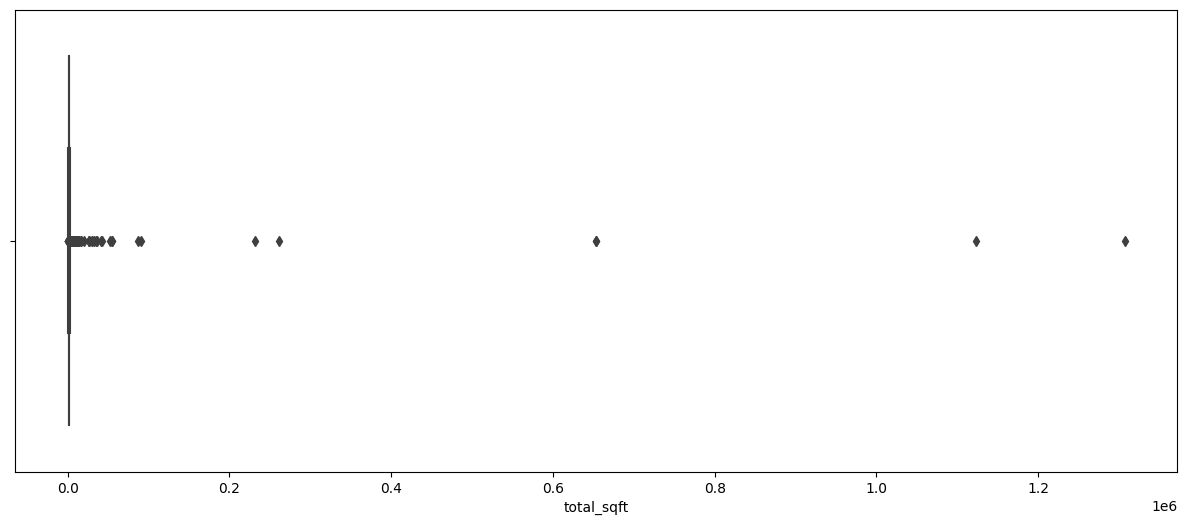

In [287]:
# Outlier Analysis for 'total square feet' column
plt.figure(figsize=(15,6))
sns.boxplot(data=data, x='total_sqft')  # A lot of outliers present
plt.show()

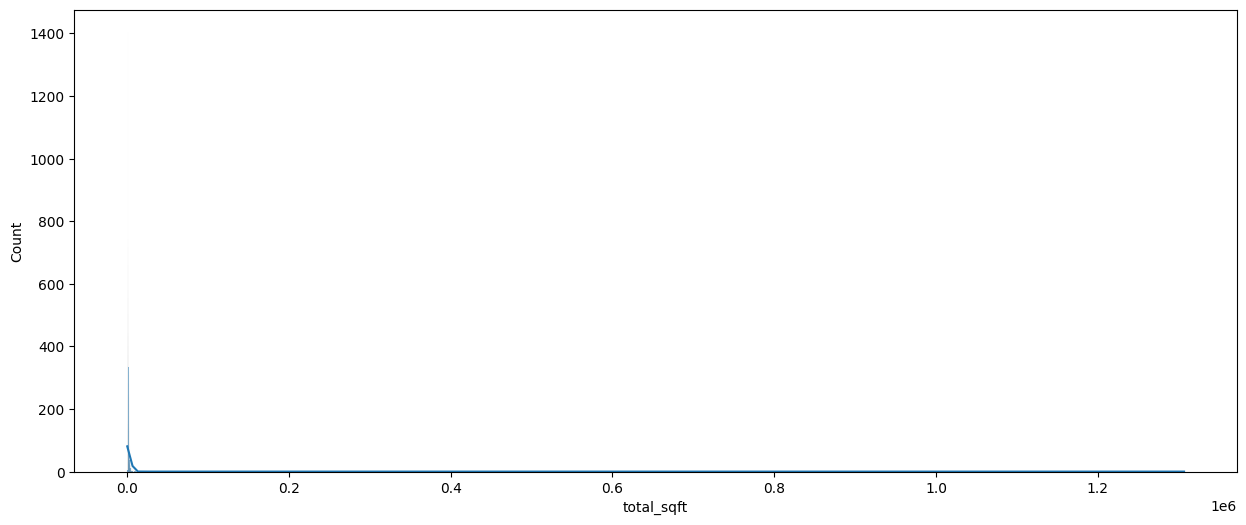

In [288]:
# Outlier Analysis for 'total square feet' column
plt.figure(figsize=(15,6))
sns.histplot(data=data, x='total_sqft', kde=True)
plt.show()

In [289]:
# level of skew
data['total_sqft'].skew()

60.02876049765801

In [290]:
# Check outliers
iqr_check_outliers(data,'total_sqft')

0             1.000
1             5.000
2            11.000
3            15.000
4            24.000
            ...    
13255      4500.000
13264      5667.500
13290      7502.508
13291    261360.000
13296      7707.024
Name: total_sqft, Length: 1161, dtype: float64

In [291]:
# handle outliers
iqr_handle_outliers(data,'total_sqft')

,area_type,availability,location,total_sqft,balcony,price,no_rooms,room_types
0,Plot Area,Ready To Move,Sarjapur Road,NaN,0,120.00,4,Bedroom
1,Built-up Area,Ready To Move,Others,NaN,3,115.00,7,BHK
2,Plot Area,Specific Date,Others,NaN,2,74.00,3,Bedroom
3,Carpet Area,Ready To Move,Others,NaN,0,30.00,1,BHK
4,Built-up Area,Ready To Move,Others,NaN,2,150.00,5,Bedroom
...,...,...,...,...,...,...,...,...
13315,Super built-up Area,Specific Date,Thanisandra,1185.5,0,58.68,2,BHK
13316,Super built-up Area,Specific Date,Mysore Road,1029.5,0,50.86,2,BHK
13317,Super built-up Area,Ready To Move,Hormavu,1081.5,0,38.66,2,BHK
13318,Super built-up Area,Specific Date,Mysore Road,1005.0,0,35.17,2,BHK


In [292]:
# Delete rows whose value in column 'total_sqft' is None
data.dropna(subset=['total_sqft'], how='all', inplace=True)

# check shape after processing
data['total_sqft'].shape

(11577,)

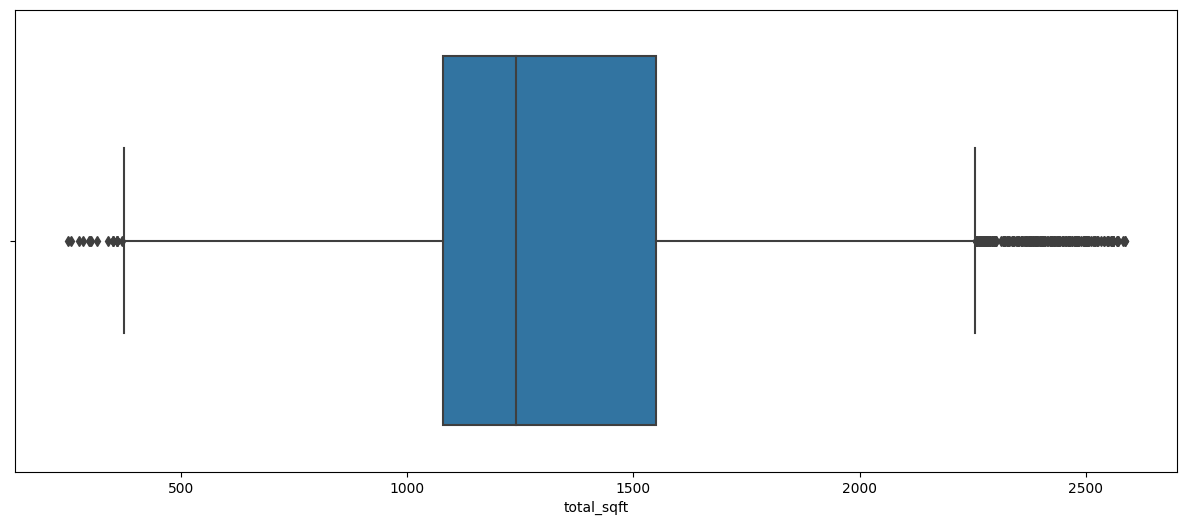

In [293]:
# Show box chart after processing outliers
plt.figure(figsize=(15,6))
sns.boxplot(data=data, x='total_sqft')
plt.show()

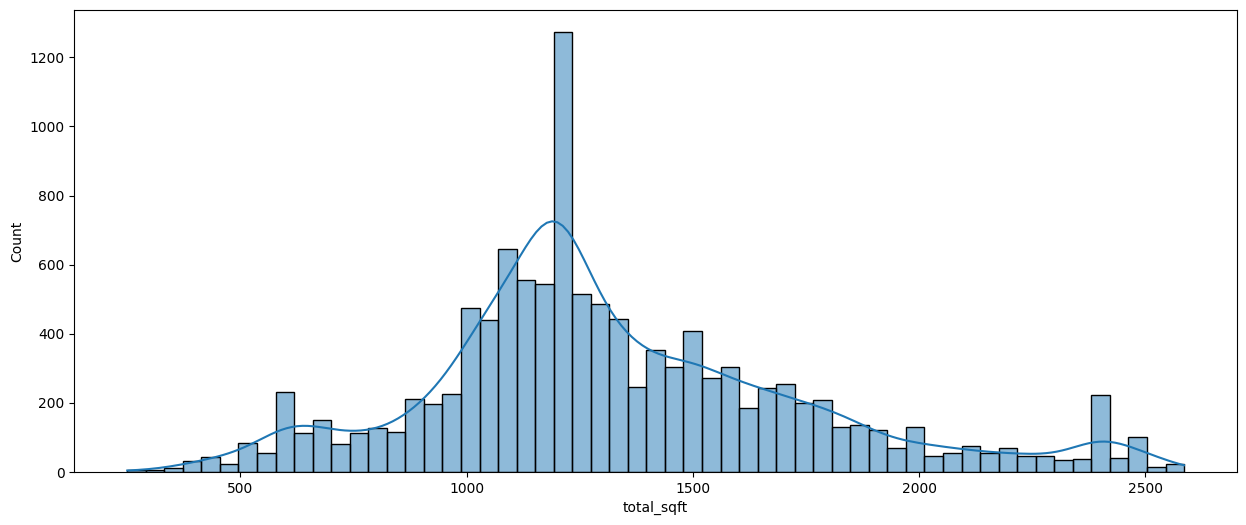

In [294]:
# Show hist chart after processing outliers
plt.figure(figsize=(15,6))
sns.histplot(data=data, x='total_sqft', kde=True)
plt.show()

In [295]:
# level of skew after processing outliers
data['total_sqft'].skew()

0.6419885549575544

### "no_rooms"

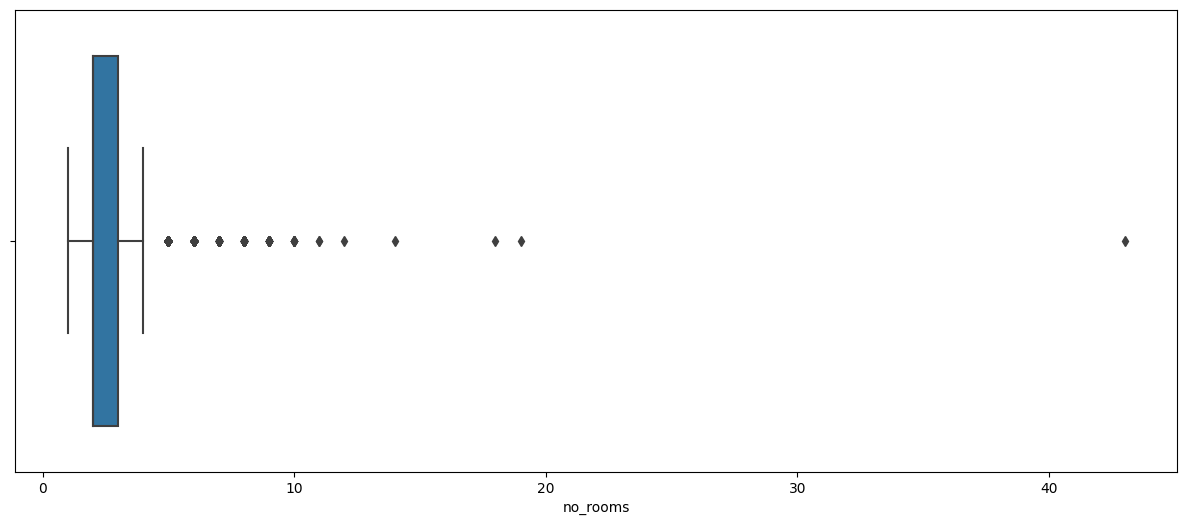

In [296]:
# Outlier Analysis for 'no_rooms' column
plt.figure(figsize=(15,6))
sns.boxplot(data=data, x='no_rooms')  # A lot of outliers present
plt.show()

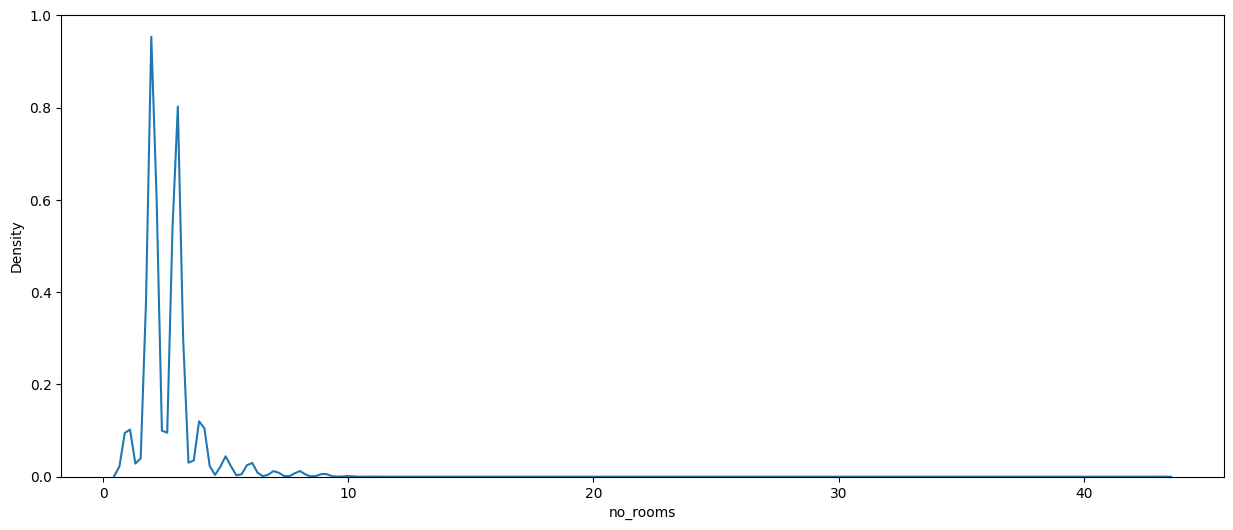

In [297]:
# Outlier Analysis for 'no_rooms' column
plt.figure(figsize=(15,6))
sns.kdeplot(data=data, x='no_rooms')
plt.show()

In [298]:
# level of skew
data['no_rooms'].skew()

5.608862998475837

In [299]:
# Check outliers
iqr_check_outliers(data,'no_rooms')

33       5
116      6
119      5
129      5
158      6
        ..
11962    9
11978    5
13193    5
13241    6
13252    5
Name: no_rooms, Length: 598, dtype: int32

In [300]:
# handle outliers
iqr_handle_outliers(data,'no_rooms')

,area_type,availability,location,total_sqft,balcony,price,no_rooms,room_types
7,Super built-up Area,Ready To Move,Others,250.0,2,40.00,1.0,BHK
8,Plot Area,Ready To Move,Hennur Road,276.0,3,23.00,2.0,Bedroom
9,Super built-up Area,Ready To Move,Yelahanka New Town,284.0,1,8.00,1.0,BHK
10,Super built-up Area,Specific Date,Others,296.0,0,22.89,1.0,RK
11,Carpet Area,Ready To Move,Nagarbhavi,300.0,1,20.00,1.0,BHK
...,...,...,...,...,...,...,...,...
13315,Super built-up Area,Specific Date,Thanisandra,1185.5,0,58.68,2.0,BHK
13316,Super built-up Area,Specific Date,Mysore Road,1029.5,0,50.86,2.0,BHK
13317,Super built-up Area,Ready To Move,Hormavu,1081.5,0,38.66,2.0,BHK
13318,Super built-up Area,Specific Date,Mysore Road,1005.0,0,35.17,2.0,BHK


In [301]:
# Delete rows whose value in column 'no_rooms' is None
data.dropna(subset=['no_rooms'], how='all', inplace=True)

# check shape after processing
data['no_rooms'].shape

(11216,)

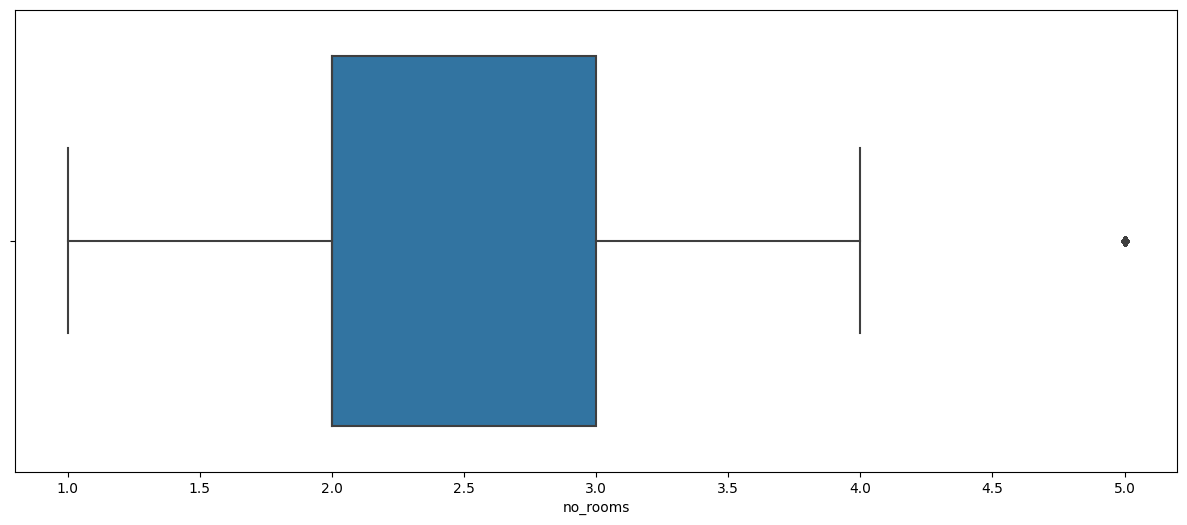

In [302]:
# Show box chart after processing outliers
plt.figure(figsize=(15,6))
sns.boxplot(data=data, x='no_rooms')
plt.show()

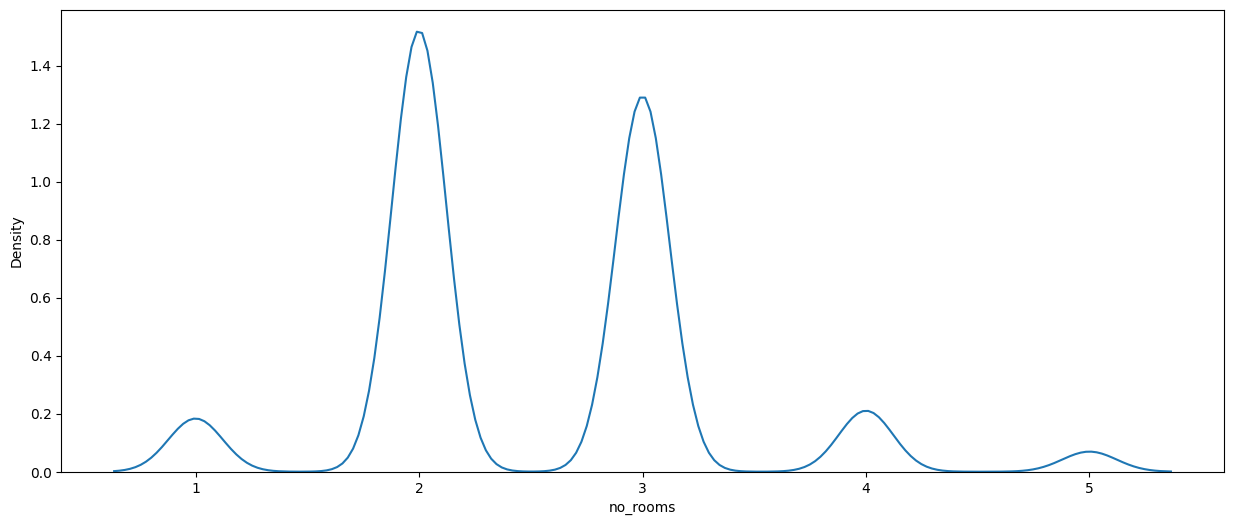

In [303]:
# Show kde chart after processing outliers
plt.figure(figsize=(15,6))
sns.kdeplot(data=data, x='no_rooms')
plt.show()

In [304]:
# level of skew after processing outliers
data['no_rooms'].skew()

0.605370996454576

### "price"

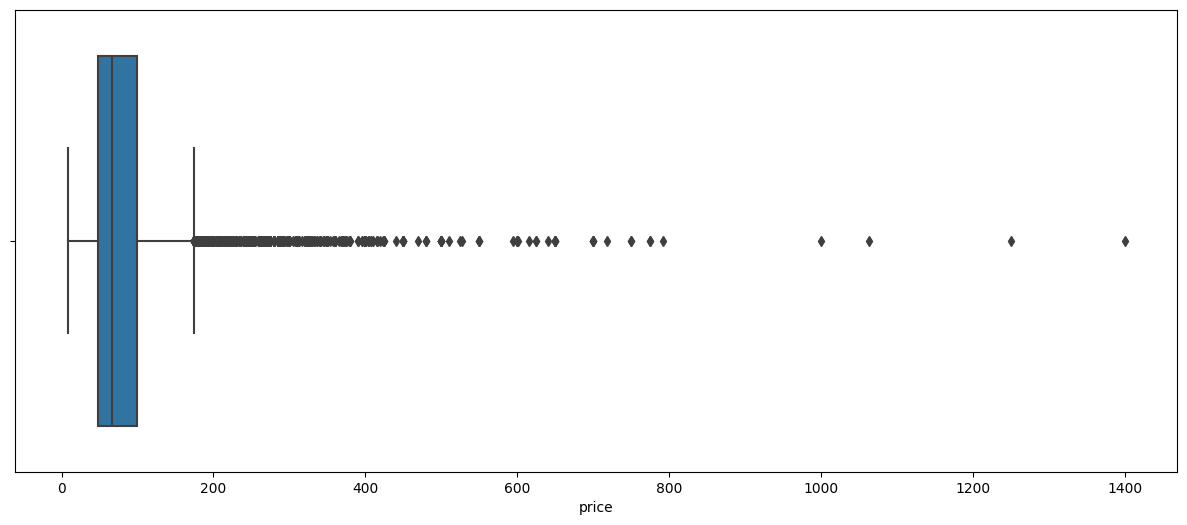

In [305]:
# Outlier Analysis for 'price' column
plt.figure(figsize=(15,6))
sns.boxplot(data=data, x='price')  # A lot of outliers present
plt.show()

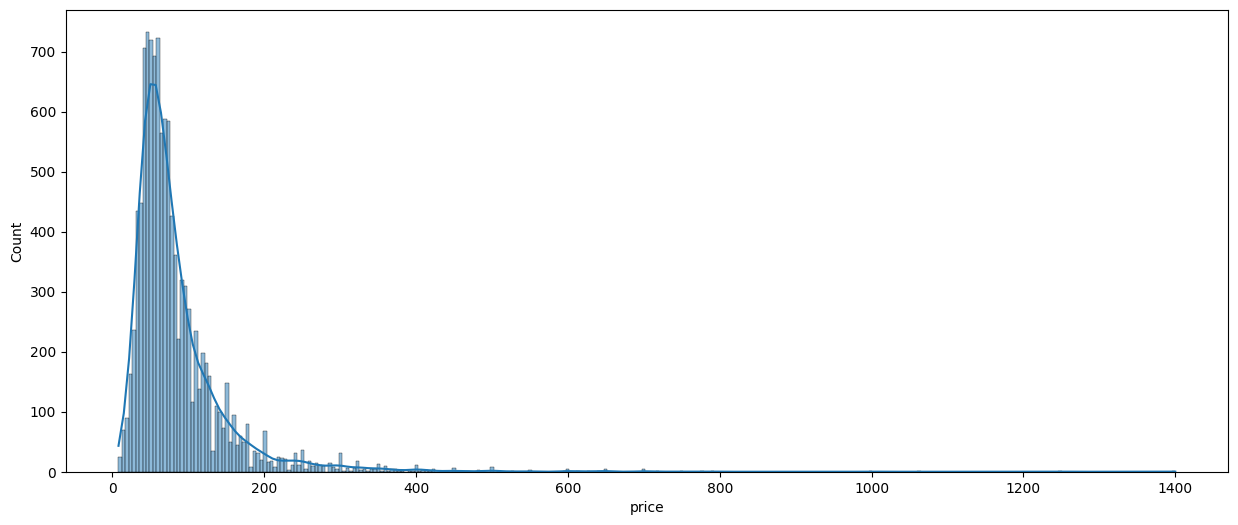

In [306]:
# Outlier Analysis for 'price' column
plt.figure(figsize=(15,6))
sns.histplot(data=data, x='price', kde=True)
plt.show()

In [307]:
# level of skew
data['price'].skew()

4.648756187272757

In [308]:
# Check outliers
iqr_check_outliers(data,'price')

33       200.0
65       750.0
150      220.0
571      500.0
731      195.0
         ...  
13172    180.0
13179    185.0
13180    186.0
13184    293.0
13252    400.0
Name: price, Length: 789, dtype: float64

In [309]:
# handle outliers
iqr_handle_outliers(data,'price')

,area_type,availability,location,total_sqft,balcony,price,no_rooms,room_types
7,Super built-up Area,Ready To Move,Others,250.0,2,40.00,1.0,BHK
8,Plot Area,Ready To Move,Hennur Road,276.0,3,23.00,2.0,Bedroom
9,Super built-up Area,Ready To Move,Yelahanka New Town,284.0,1,8.00,1.0,BHK
10,Super built-up Area,Specific Date,Others,296.0,0,22.89,1.0,RK
11,Carpet Area,Ready To Move,Nagarbhavi,300.0,1,20.00,1.0,BHK
...,...,...,...,...,...,...,...,...
13315,Super built-up Area,Specific Date,Thanisandra,1185.5,0,58.68,2.0,BHK
13316,Super built-up Area,Specific Date,Mysore Road,1029.5,0,50.86,2.0,BHK
13317,Super built-up Area,Ready To Move,Hormavu,1081.5,0,38.66,2.0,BHK
13318,Super built-up Area,Specific Date,Mysore Road,1005.0,0,35.17,2.0,BHK


In [310]:
# Delete rows whose value in column 'price' is None
data.dropna(subset=['price'], how='all', inplace=True)

# check shape after processing
data['price'].shape

(10470,)

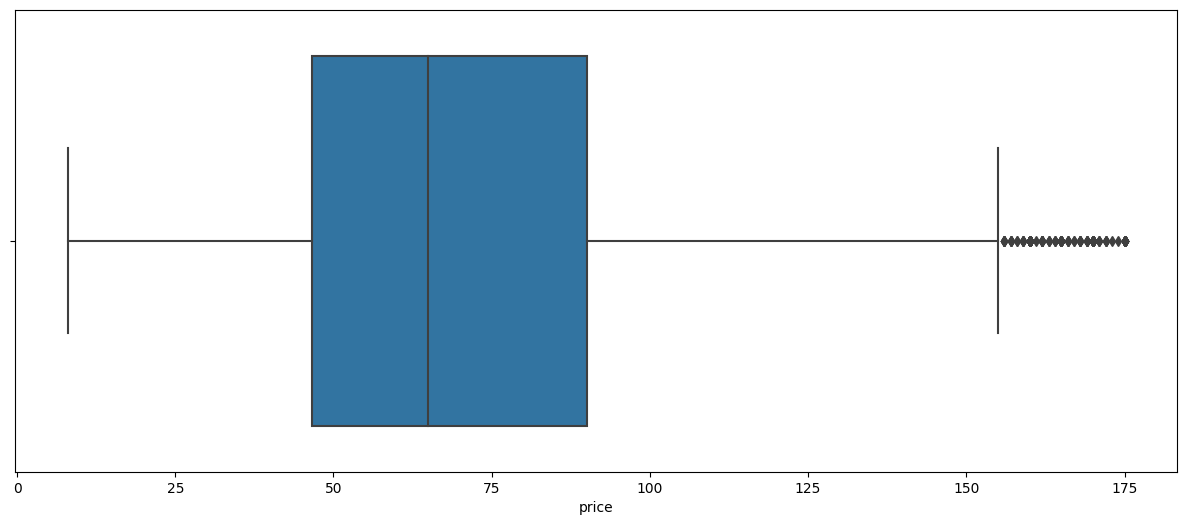

In [311]:
# Show box chart after processing outliers
plt.figure(figsize=(15,6))
sns.boxplot(data=data, x='price')
plt.show()

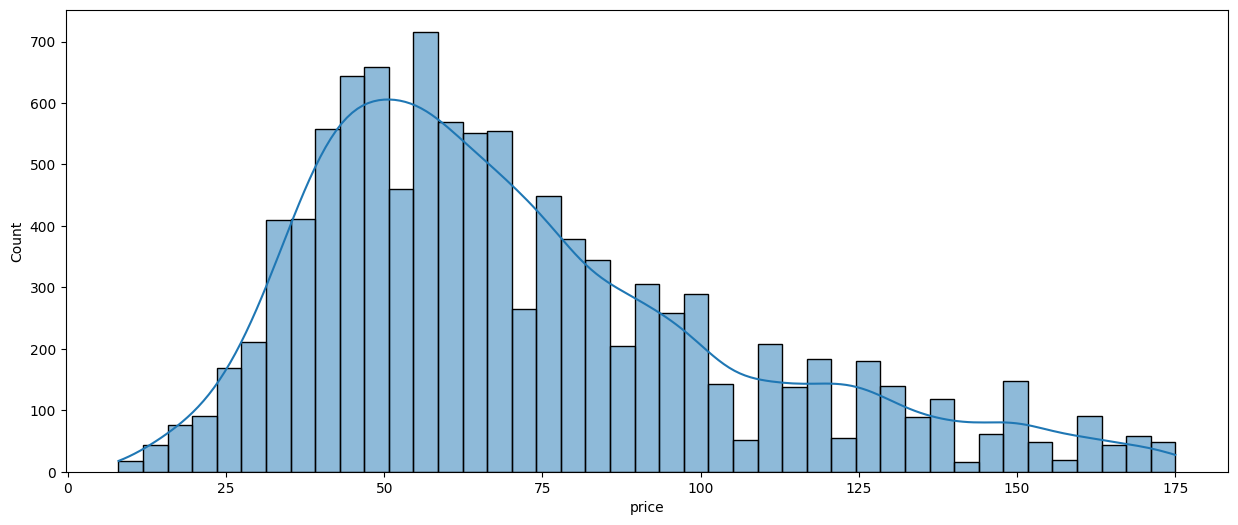

In [312]:
# Show hist chart after processing outliers
plt.figure(figsize=(15,6))
sns.histplot(data=data, x='price', kde=True)
plt.show()

In [313]:
# level of skew after processing outliers
data['price'].skew()

0.9190656016659835

## Distinct Groups in Each Column

In [314]:
# Top 5 records
data.head()

,area_type,availability,location,total_sqft,balcony,price,no_rooms,room_types
7,Super built-up Area,Ready To Move,Others,250.0,2,40.00,1.0,BHK
8,Plot Area,Ready To Move,Hennur Road,276.0,3,23.00,2.0,Bedroom
9,Super built-up Area,Ready To Move,Yelahanka New Town,284.0,1,8.00,1.0,BHK
10,Super built-up Area,Specific Date,Others,296.0,0,22.89,1.0,RK
11,Carpet Area,Ready To Move,Nagarbhavi,300.0,1,20.00,1.0,BHK


In [315]:
# reset index
data = data.reset_index(drop=True)
data

,area_type,availability,location,total_sqft,balcony,price,no_rooms,room_types
0,Super built-up Area,Ready To Move,Others,250.0,2,40.00,1.0,BHK
1,Plot Area,Ready To Move,Hennur Road,276.0,3,23.00,2.0,Bedroom
2,Super built-up Area,Ready To Move,Yelahanka New Town,284.0,1,8.00,1.0,BHK
3,Super built-up Area,Specific Date,Others,296.0,0,22.89,1.0,RK
4,Carpet Area,Ready To Move,Nagarbhavi,300.0,1,20.00,1.0,BHK
...,...,...,...,...,...,...,...,...
10465,Super built-up Area,Specific Date,Thanisandra,1185.5,0,58.68,2.0,BHK
10466,Super built-up Area,Specific Date,Mysore Road,1029.5,0,50.86,2.0,BHK
10467,Super built-up Area,Ready To Move,Hormavu,1081.5,0,38.66,2.0,BHK
10468,Super built-up Area,Specific Date,Mysore Road,1005.0,0,35.17,2.0,BHK


In [316]:
# Distinct Groups in Each Column
for i in data[['area_type','availability','room_types']]:
    print(data[i].value_counts())
    print()
    print("*"*40)
    print()
print(data['location'].value_counts())

area_type
Super built-up Area    7472
Built-up Area          1933
Plot Area               991
Carpet Area              74
Name: count, dtype: int64

****************************************

availability
Ready To Move    8183
Specific Date    2287
Name: count, dtype: int64

****************************************

room_types
BHK        9247
Bedroom    1210
RK           13
Name: count, dtype: int64

****************************************

location
Others             2068
Whitefield          412
Sarjapur Road       301
Electronic City     281
Kanakpura Road      234
                   ... 
Doddaballapur         4
BTM 1st Stage         4
Sarakki Nagar         4
Giri Nagar            4
HAL 2nd Stage         3
Name: count, Length: 246, dtype: int64


#### Numerical Columns 

In [317]:
# Statistical information for numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,10470.0,1284.946047,378.557430,250.0,1070.00,1221.0,1500.0,2585.5
balcony,10470.0,1.509551,0.812345,0.0,1.00,1.0,2.0,3.0
price,10470.0,71.826355,33.933714,8.0,46.64,65.0,90.0,175.0
no_rooms,10470.0,2.464470,0.737120,1.0,2.00,2.0,3.0,5.0


#### Categorical Columns

In [318]:
# Statistical information for object columns
data.describe(include = 'object')

,area_type,availability,location,room_types
count,10470,10470,10470,10470
unique,4,2,246,3
top,Super built-up Area,Ready To Move,Others,BHK
freq,7472,8183,2068,9247


In [319]:
# change data types of no_rooms column
data['no_rooms'] = data['no_rooms'].astype(int)

# check data information after data processing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10470 entries, 0 to 10469
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     10470 non-null  object 
 1   availability  10470 non-null  object 
 2   location      10470 non-null  object 
 3   total_sqft    10470 non-null  float64
 4   balcony       10470 non-null  int32  
 5   price         10470 non-null  float64
 6   no_rooms      10470 non-null  int32  
 7   room_types    10470 non-null  object 
dtypes: float64(2), int32(2), object(4)
memory usage: 572.7+ KB


## Univariate Analysis

### Area Types

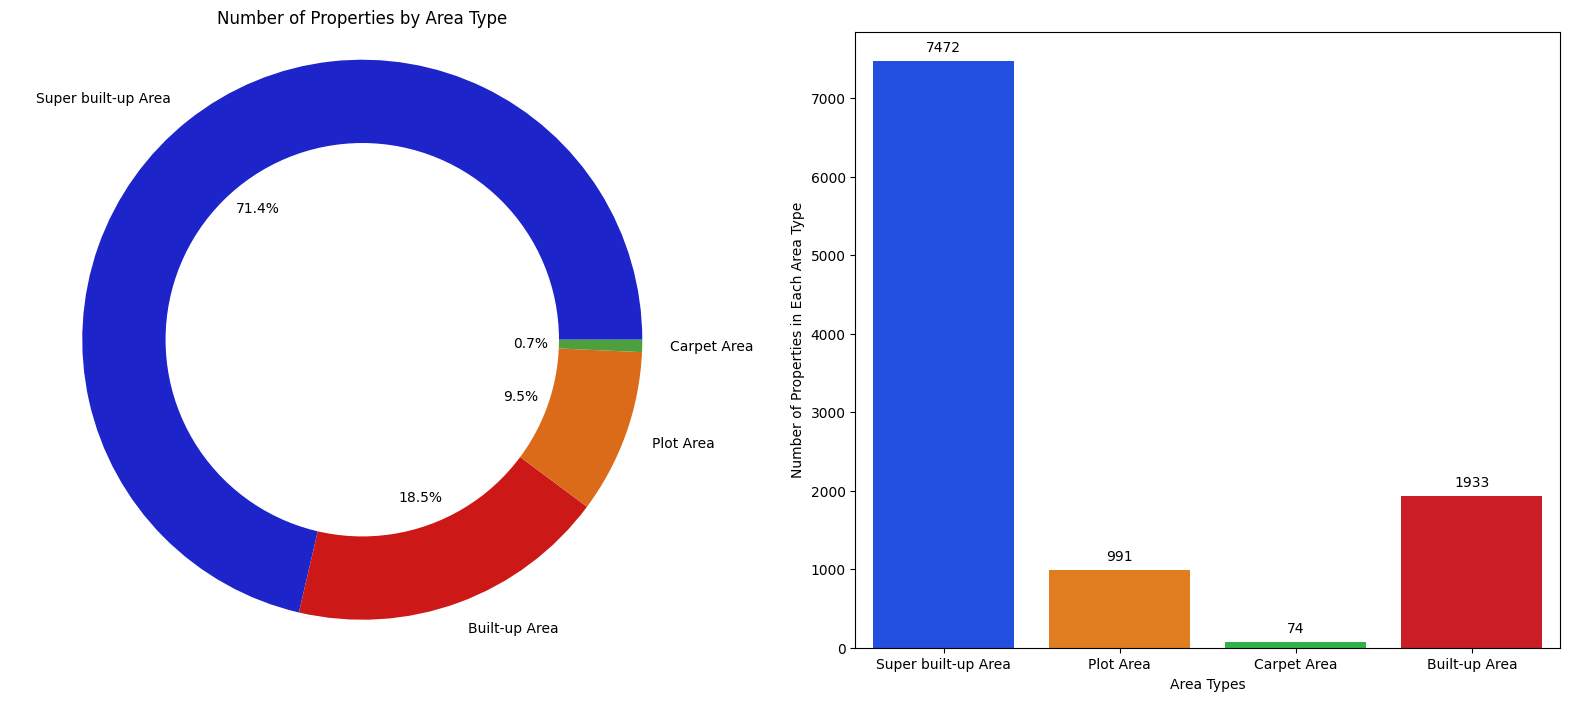

In [320]:
# count the value of each area type
area_type_counts = data['area_type'].value_counts()

# create pie chart
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt.pie(area_type_counts, labels=area_type_counts.index, autopct='%1.1f%%', colors=['#1D24CA','#CD1818','#DC6B19','#4E9F3D'])
"""
blue'#1D24CA', orange'#DC6B19', green'#4E9F3D', red'#CD1818'])
"""
plt.title('Number of Properties by Area Type')
my_circle = plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('equal')  # Make sure that the pie chart drawn is a pie chart

plt.subplot(1,2,2)
ax = sns.countplot(data=data, x="area_type",palette='bright')
plt.xlabel("Area Types")
plt.ylabel("Number of Properties in Each Area Type")
# add value per column
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),  # choose number format (no decimals)
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

#### insights
- Super built-up area: is the area with the largest number of houses (7472, accounting for 71.4%), is a densely populated area, most likely the city center.
- Built-up area: although not equal to Super built-up area, it is still an area with a high number of houses, and accounts for a significant proportion (1933, accounting for 18.5%), possibly a newly developed urban area, with Good infrastructure and services.
- Plot area: has a significant number of houses (991, accounting for 9.5%), is a moderate-sized residential area.
- Carpet area: is the area with the fewest houses (74, accounting for 0.7%), sparsely populated, may be rural, or a less developed area with limited services.


### Availability

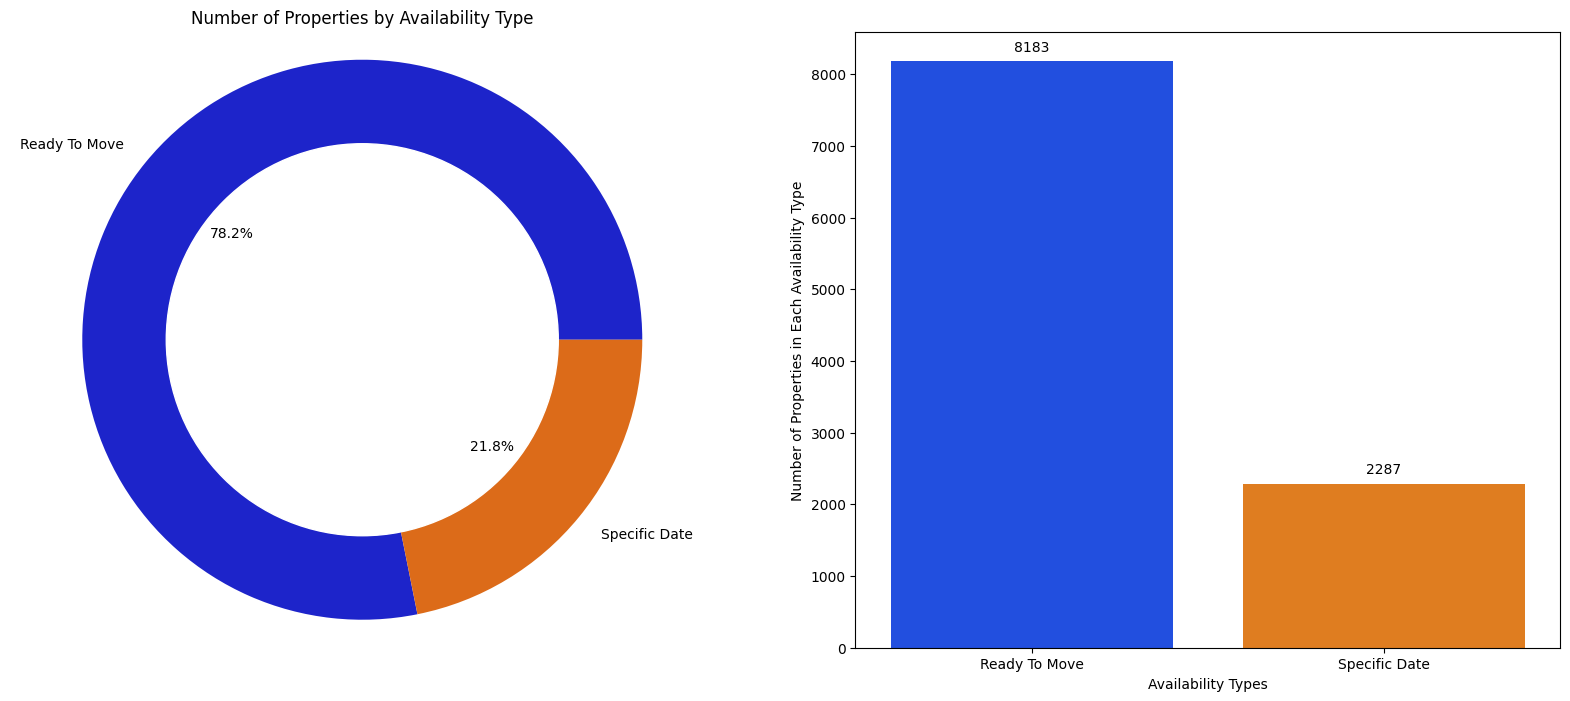

In [321]:
# count the value of each availability type
availability_counts = data['availability'].value_counts()

# create pie chart
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt.pie(availability_counts, labels=availability_counts.index, autopct='%1.1f%%', colors=['#1D24CA','#DC6B19'])
"""
blue'#1D24CA', orange'#DC6B19', green'#4E9F3D', red'#CD1818'])
"""
plt.title('Number of Properties by Availability Type')
my_circle = plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('equal')  # Make sure that the pie chart drawn is a pie chart

plt.subplot(1,2,2)
ax = sns.countplot(data=data, x="availability",palette='bright')
plt.xlabel("Availability Types")
plt.ylabel("Number of Properties in Each Availability Type")
# add value per column
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),  # choose number format (no decimals)
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

#### insights
- Ready to move: accounts for 78.2%, showing that the majority of houses are ready for buyers or renters to move in without waiting.
- The exact day: houses where the move-in date can be fixed in advance. Only accounts for 21.8%. Suitable for those who have specific plans regarding moving time, while waiting for financial or legal procedures, or in accordance with personal needs.

### Total Square Feet

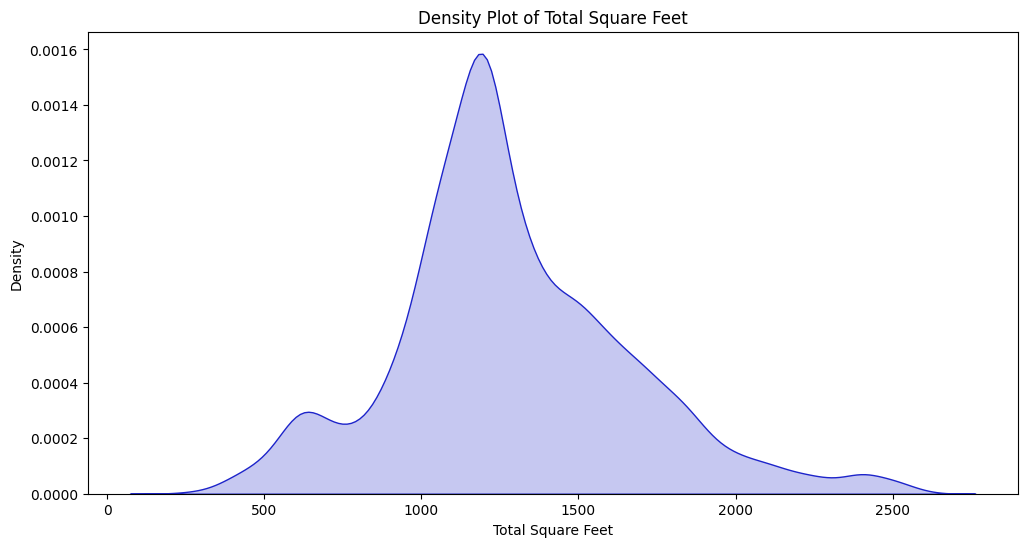

In [322]:
# create kde chart
plt.figure(figsize=(12, 6))
sns.kdeplot(data['total_sqft'], fill=True, color='#1D24CA')  # `fill=True` will fill the area under the curve
plt.title('Density Plot of Total Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Density')
plt.show()

#### insights
- The average house area is 1245.74 sqft.
- The smallest house is 435 sqft.
- The house has the largest area of 2130 sqft.
- House sizes mainly range from 1060 sqft to 1450 sqft.

### balcony

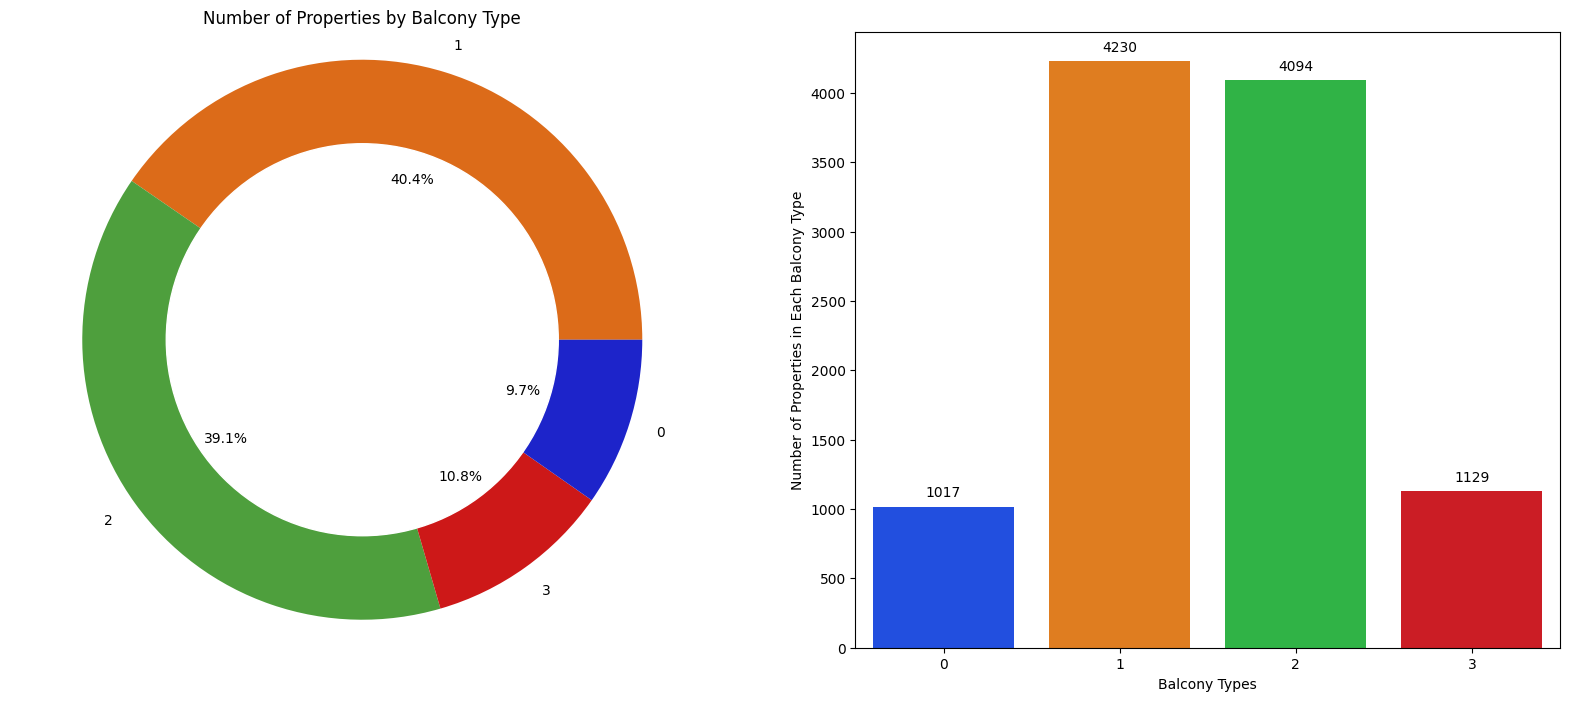

In [323]:
# count the value of each balcony type
balcony_counts = data['balcony'].value_counts()

# create pie chart
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt.pie(balcony_counts, labels=balcony_counts.index, autopct='%1.1f%%', colors=['#DC6B19','#4E9F3D','#CD1818','#1D24CA'])
"""
blue'#1D24CA', orange'#DC6B19', green'#4E9F3D', red'#CD1818'])
"""
plt.title('Number of Properties by Balcony Type')
my_circle = plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('equal')  # Make sure that the pie chart drawn is a pie chart

plt.subplot(1,2,2)
ax = sns.countplot(data=data, x="balcony",palette='bright')
plt.xlabel("Balcony Types")
plt.ylabel("Number of Properties in Each Balcony Type")
# add value per column
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),  # choose number format (no decimals)
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

#### insights
- None: accounts for about 10%, possibly due to small space, or to make the price more affordable. Suitable for people who are less interested in outdoor space, or in crowded urban areas with limited space.
- 1 balcony: accounts for the largest number, 40.4%. Shows that the majority of users prioritize having at least 1 outdoor space, used for many purposes such as growing plants, resting, or drying clothes.
- 2 balcony: very high quantity, only 1% lower than 1 balcony. Shows a significant preference for houses with 2 balconies.
- 3 balcony: accounts for a low but still significant proportion (10%). Reflecting the needs of a high-end customer segment that desires luxury and larger outdoor spaces.

### no_rooms

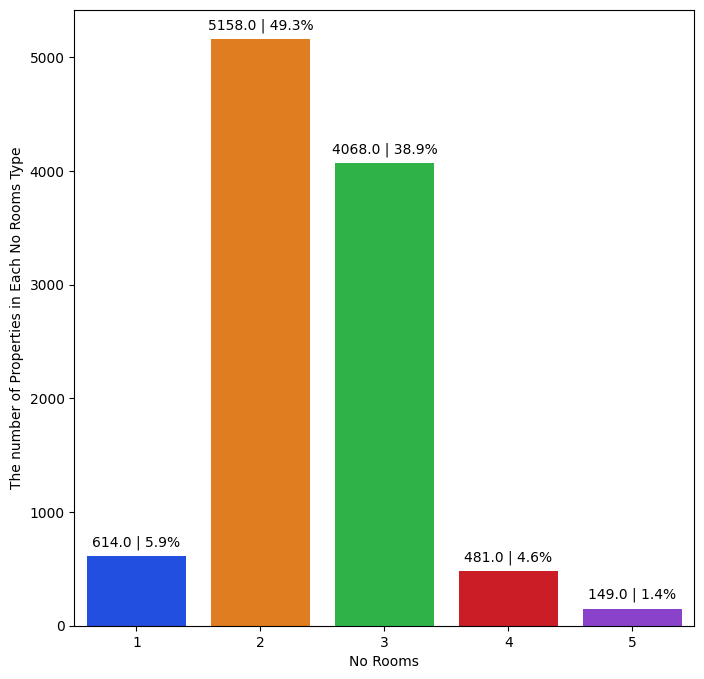

In [324]:
# create chart
plt.figure(figsize=(8, 8))
ax = sns.countplot(data=data, x="no_rooms", palette='bright')
plt.xlabel("No Rooms")
plt.ylabel("The number of Properties in Each No Rooms Type")

total = len(data)  # Calculate the length of the data, to get the total percentage

# add data amount and percentage on top column
for p in ax.patches:
    height = p.get_height()  # value in each column
    percentage = f'{100 * height/total:.1f}%'  # Calculate the percentage of each type
    annotation = f'{height} | {percentage}'  # Combine quantities and percentages
    ax.annotate(annotation,  # add note on top column
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center',
                xytext=(0, 10),  # push note on top
                textcoords='offset points')

plt.show()

#### insights
- 1 room: not a high proportion, demand for this type of house is quite low. Can be a small apartment, suitable for individuals who do not have a need for large space, and want a more economical option.
- 2 rooms: this is the most popular type, accounting for half of the market. Reflecting that customers have high needs for space, such as 1 bedroom, and 1 other room that can be used as an office or living room.
- 3 rooms: accounts for a significant proportion of 39%. Similar to 2 rooms, it can be used as a bedroom, office, and entertainment space. But maybe because the price is higher, there is less demand for 2 rooms.
- Greater than 3 rooms: accounts for a low percentage, only about 5%, showing that the demand for houses with many rooms is quite limited.

### room types

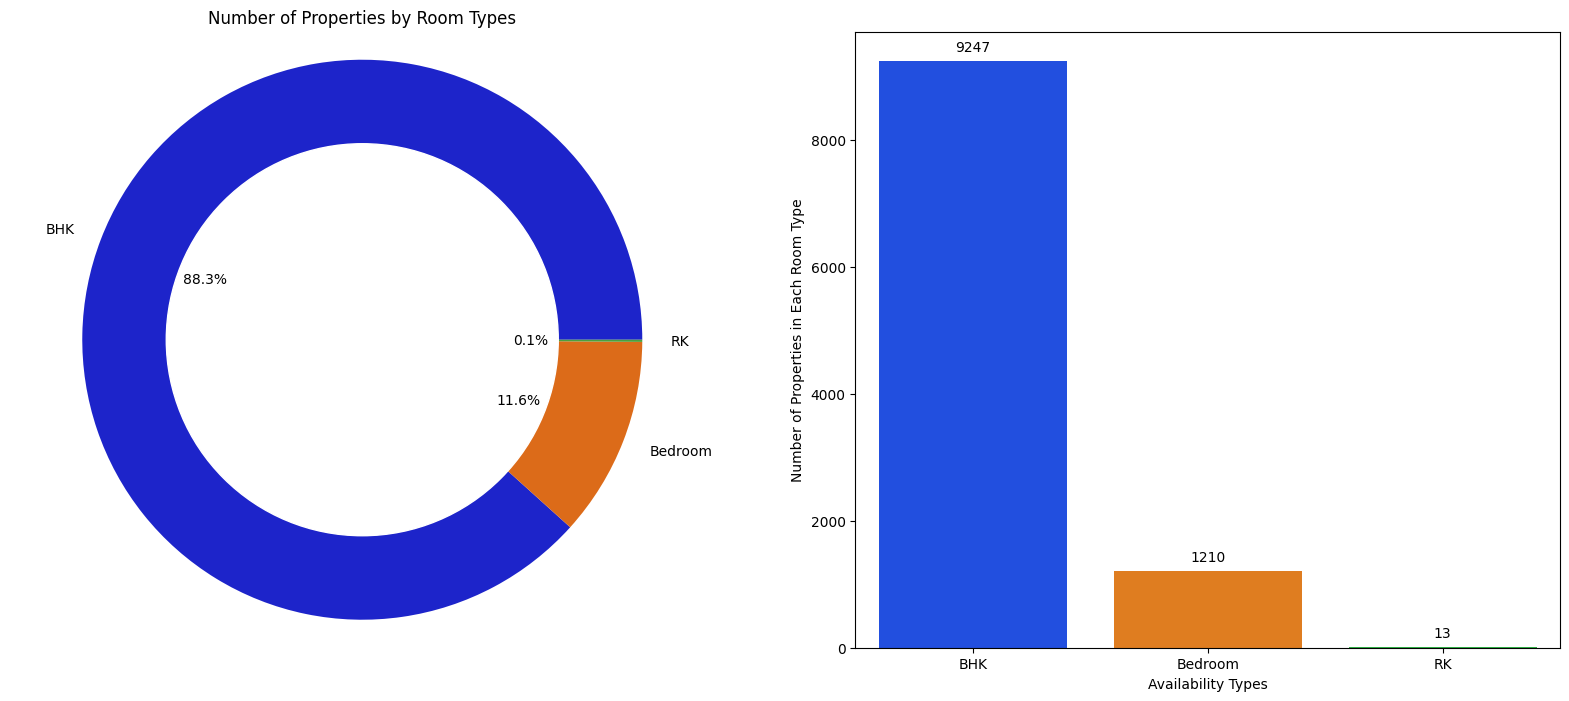

In [325]:
# count the value of each room type
room_types_counts = data['room_types'].value_counts()

# create pie chart
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt.pie(room_types_counts, labels=room_types_counts.index, autopct='%1.1f%%', colors=['#1D24CA','#DC6B19','#4E9F3D'])
"""
blue'#1D24CA', orange'#DC6B19', green'#4E9F3D', red'#CD1818'])
"""
plt.title('Number of Properties by Room Types')
my_circle = plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('equal')  # Make sure that the pie chart drawn is a pie chart

plt.subplot(1,2,2)
ax = sns.countplot(data=data, x="room_types",palette='bright')
plt.xlabel("Availability Types")
plt.ylabel("Number of Properties in Each Room Type")
# add value per column
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),  # choose number format (no decimals)
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

#### insights
- BHK: means a house with at least 1 bedroom, 1 living room, and 1 kitchen. It is a popular type of house, accounting for an overwhelming rate of 88.3%. Reflects widespread demand for fully furnished living spaces.
- Bedrooms: this category only includes bedrooms, and may not include kitchens, or living rooms. This type only accounts for a small part, about 11.6%. Suitable for students or single people who don't need a lot of common space or amenities like a kitchen.
- RK: The number of houses of this type is very small, accounting for only 0.1% of the market. Suitable for low-income people, or individuals who live simply and do not need much private space.

### Price

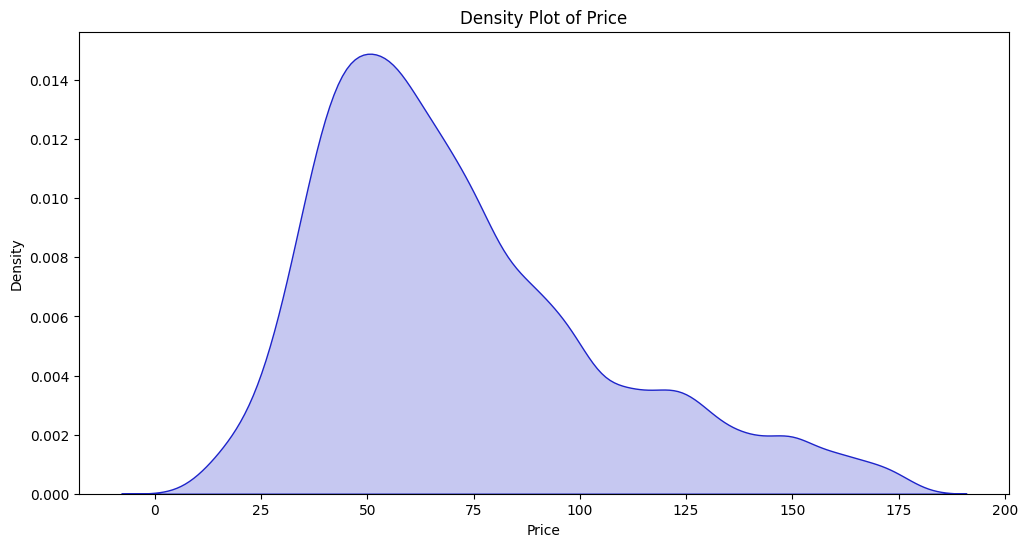

In [326]:
# create kde chart
plt.figure(figsize=(12, 6))
sns.kdeplot(data['price'], fill=True, color='#1D24CA')  # `fill=True` will full fill square under the curve
plt.title('Density Plot of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

#### insights
- The average properties price is $113.48.
- The lowest priced properties is $8.
- The highest priced properties is $3600
- Properties prices mainly range from $50 to $122.

## Bivariate Analysis

### 'Area_type' and 'price' columns

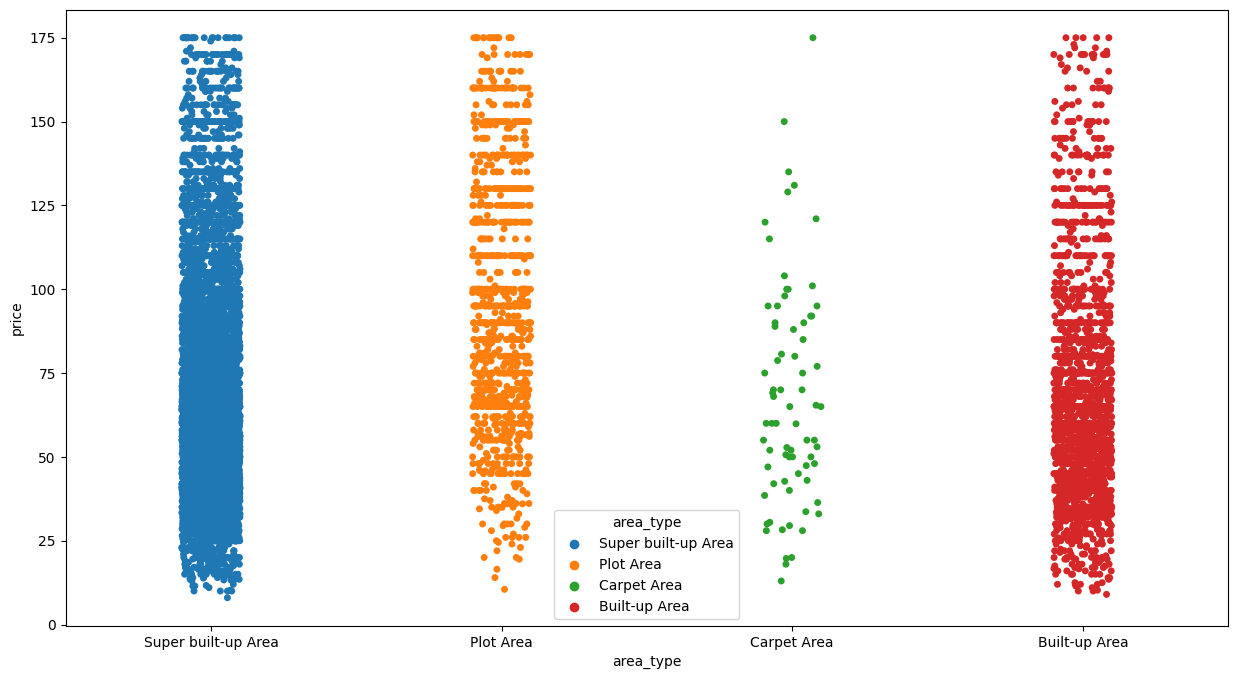

In [327]:
plt.figure(figsize=(15,8))
sns.stripplot(x=data['area_type'],y=data['price'],hue=data['area_type'], jitter=True)
plt.show()

#### insights

- Super built-up Area: the area with the densest data density (where there are the most houses), house prices are relatively evenly distributed, and close to each other. It shows that house prices in this area are quite stable, and have little variation, when prices range from $10 to $175. However, prices tend to focus from $15 to $130.
- Built-up Area and Plot Area have similar characteristics to Super built-up Area, however, house prices in Built-up Area are concentrated at $25 to $100, while Plot Area is from $50 to 100$.
- Carpet area: the area with the sparsest data density (the place with the fewest houses), house prices are relatively unevenly distributed, and far apart. Shows that house prices in this area are quite volatile, and less stable than the other 3 areas.


### 'availability' and 'price' columns

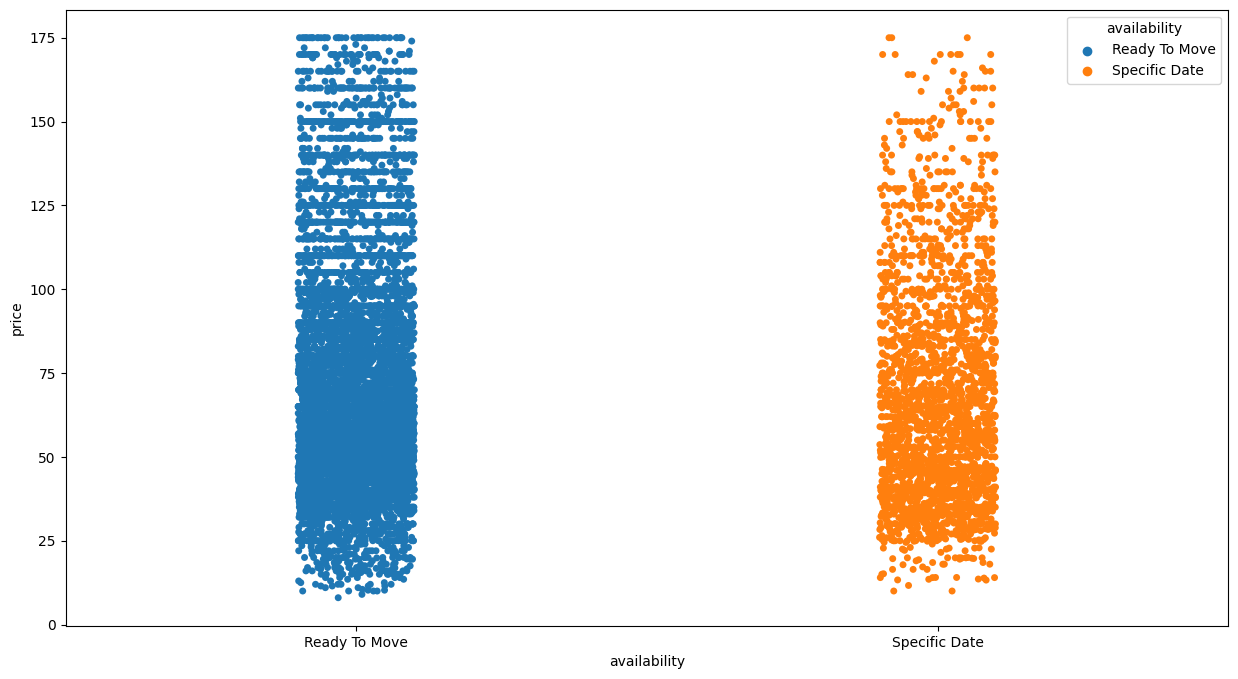

In [328]:
plt.figure(figsize=(15,8))
sns.stripplot(x=data['availability'],y=data['price'],hue=data['availability'], jitter=True)
plt.show()

#### insights
In terms of home availability, both have almost the same data density. House prices are relatively evenly distributed and close together, showing that house prices are stable, and not much affected by house availability. At the same time, house prices tend to concentrate from $25 to $100.

### 'total_sqft' and 'price' columns

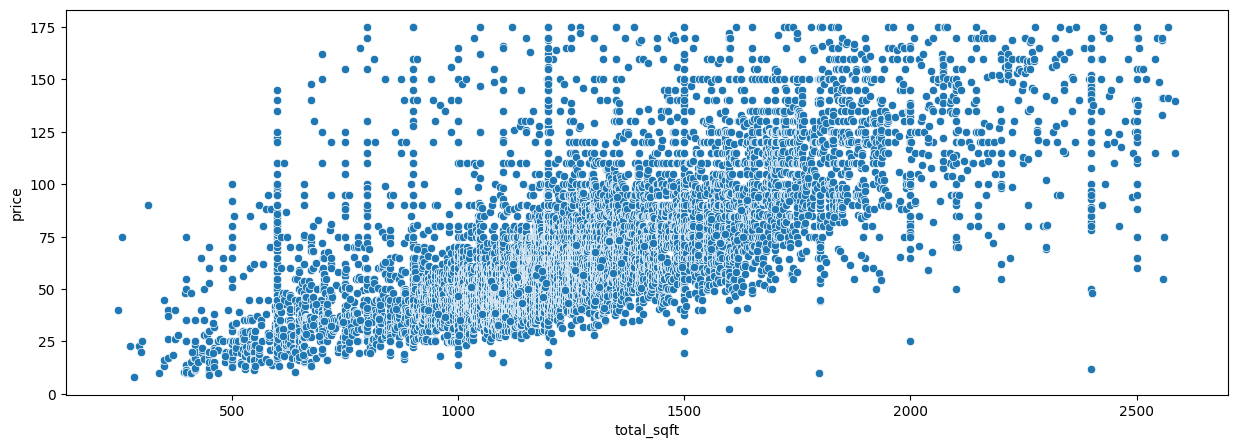

In [329]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,y='price',x='total_sqft')
plt.show()

#### insights
The data points are concentrated in a straight line increasing from left to right, showing a positive relationship between total_sqft and price, meaning the larger total_sqft, the higher the price will be.

- total_sqft ranges from 500 to 900, with prices ranging from $10 to $60
- total_sqft ranges from 900 to 1500, with prices ranging from $25 to $100
- total_sqft is between 1500 and 2000, with prices ranging from $50 to $130

=> are areas with dense data density (with the most houses), are popular segments that customers are often interested in, and need special attention.

- Total_sqft from 1500 to 2500, but price only from 8 to 50 dollars.
- Or properties with total_sqft under 500, but priced at 75 to 100 dollars.

=> Are data points that fall far from the main trend, classified as unusual cases, requiring further analysis to find the cause.


### 'balcony' and 'price' columns

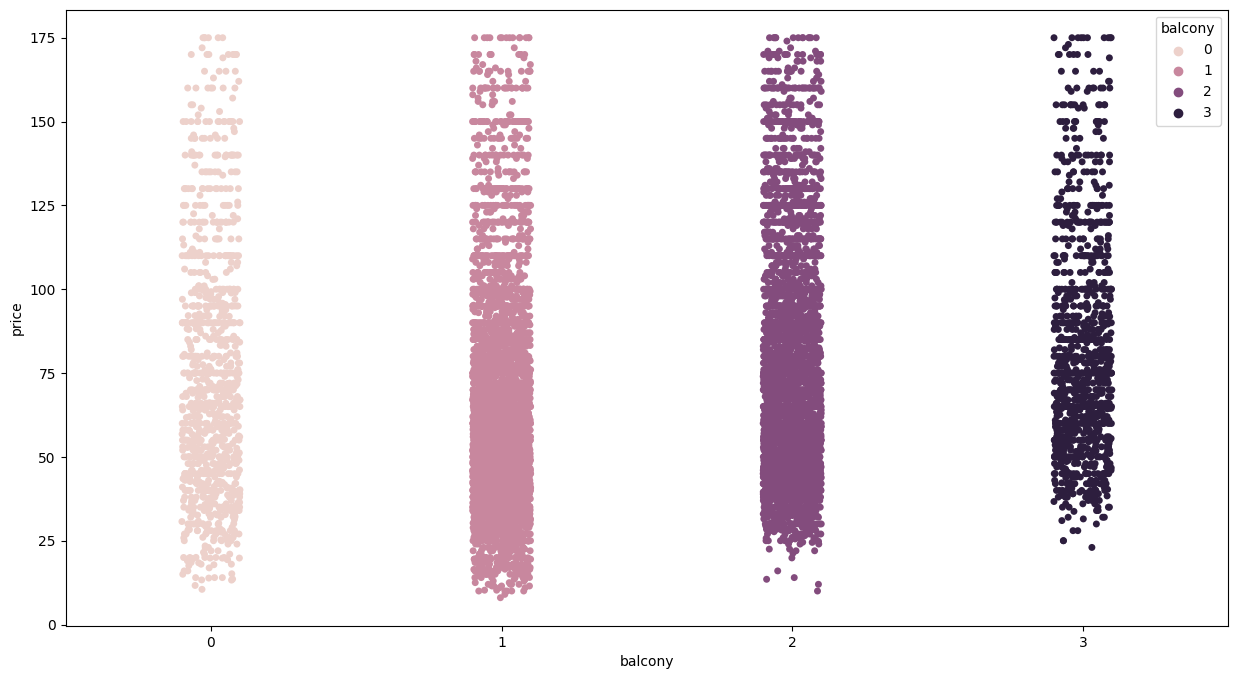

In [330]:
plt.figure(figsize=(15,8))
sns.stripplot(x=data['balcony'],y=data['price'],hue=data['balcony'],jitter=True)
plt.show()

#### insights
- In terms of data density, balconies with values of 1 and 2 have denser data than 0 and 3. It can be understood that properties with 1 or 2 balconies will be more popular than 0 or 3.

- House prices are distributed relatively evenly and close to each other, showing that no matter how many balconies a house has, the price is still relatively stable, and has little variation, ranging from $10 to $175. However, for properties with 1 or 2 balcony, prices tend to range from $25 to $100.

### 'no_rooms' and 'price' columns

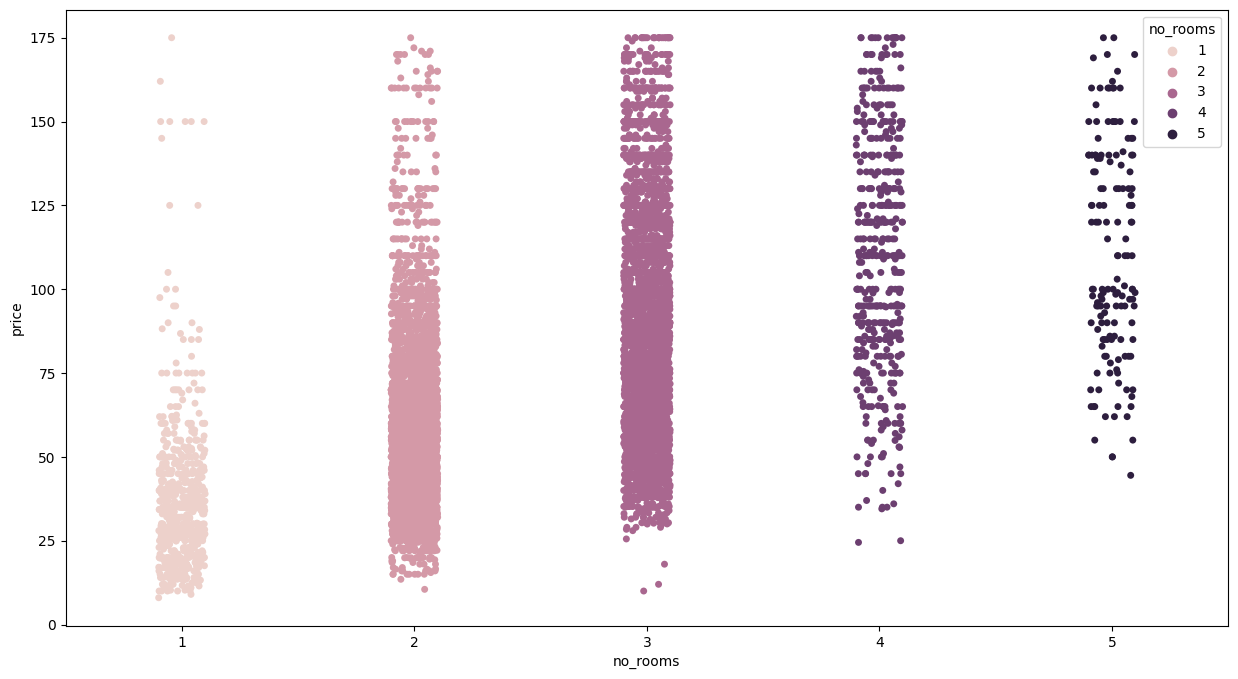

In [331]:
plt.figure(figsize=(15,8))
sns.stripplot(x=data['no_rooms'],y=data['price'],hue=data['no_rooms'], jitter=True)
plt.show()

#### insights
- 2 and 3 rooms: have the densest data density (most properties have 2 or 3 rooms, especially 3 rooms), house prices are relatively evenly distributed, and close to each other. House prices are quite stable, and have little variation, in the range from $25 to $175. For 2-room houses, prices tend to range from $20 to $110, while 3-room houses usually range from $30 to $130.
- 4 and 5 rooms: data density is not dense but evenly distributed (popular but not equal to 2 and 3 rooms). The fact that house prices are evenly distributed and close to each other shows price stability. Prices usually range from $40 to $175, spread evenly and do not tend to be concentrated.
- 1 room: dense data density ranges from $10 to $75 (for properties with 1 room, the price will usually range from $10 to $75), they are evenly distributed and close to each other. That means in the price range from $10 to $75, house prices are relatively stable. With house prices higher than $75, the density is sparse (there are very few 1-room houses priced over $75), unevenly distributed, and far apart (prices are less stable, and tend to fluctuate).

### 'room_types' and 'price' columns

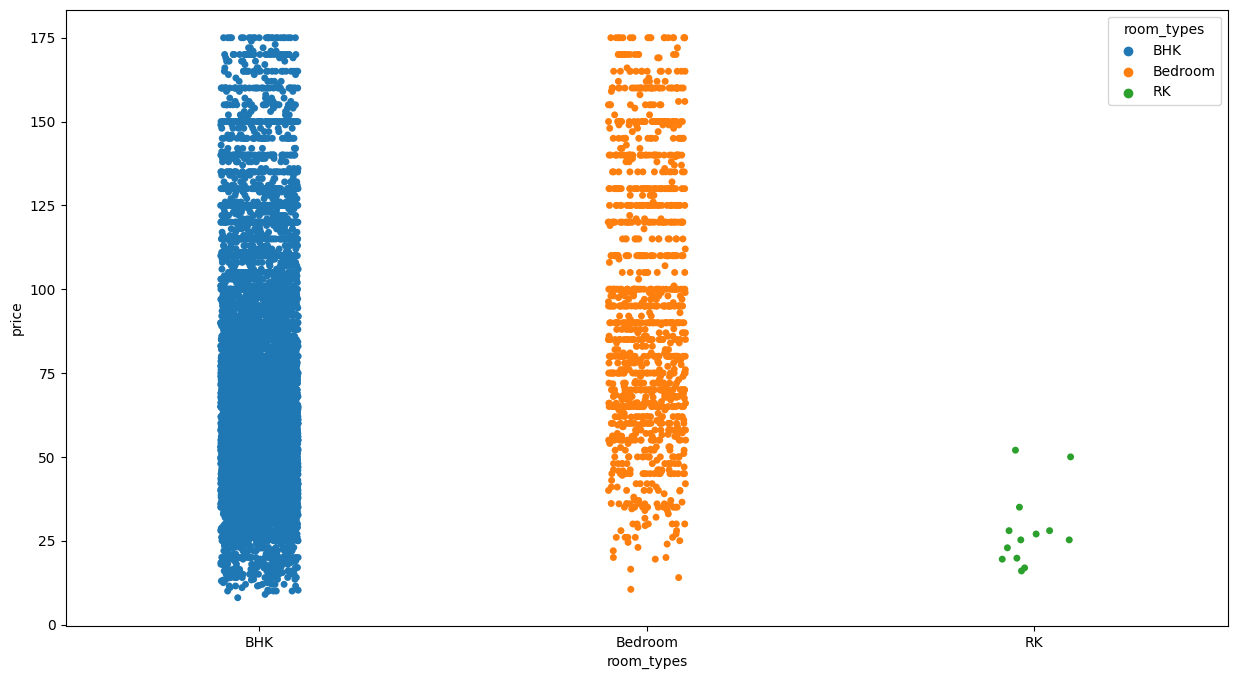

In [332]:
plt.figure(figsize=(15,8))
sns.stripplot(x=data['room_types'],y=data['price'],hue=data['room_types'], jitter=True)
plt.show()

#### insights
- BHK and Bedroom: 2 types of rooms with the densest data density (the 2 types with the most houses), house prices are relatively evenly distributed, and close to each other. Shows that house prices are stable, and less volatile, evenly distributed from 10$ to 175$. However, the price of houses where the room type is Bedroom does not tend to be concentrated, but BHK tends to be concentrated from 10$ to 130$.
- RK: room type has the sparsest data density (has the fewest houses), house prices are mainly distributed from $10 to $50, but unevenly and far apart, meaning house prices often fluctuate, and less stable.

## Correlation

In [333]:
# numerical columns
data[['total_sqft','no_rooms','balcony','price']].corr().sort_values('price', ascending=False)

,total_sqft,no_rooms,balcony,price
price,0.654875,0.548832,0.131991,1.000000
total_sqft,1.000000,0.570632,0.269567,0.654875
no_rooms,0.570632,1.000000,0.194464,0.548832
balcony,0.269567,0.194464,1.000000,0.131991


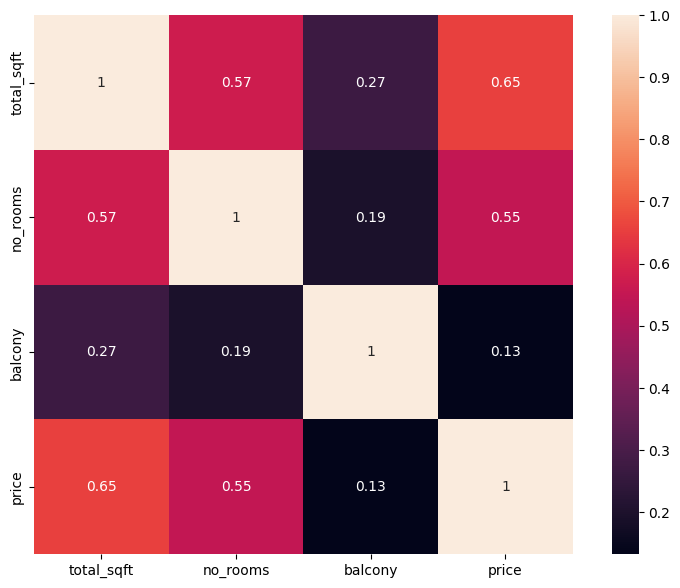

In [334]:
# create correlation chart
plt.figure(figsize=(10,7))
sns.heatmap(data[['total_sqft','no_rooms','balcony','price']].corr(), fmt='.2g', square = True, annot = True,linecolor ='black')
plt.show()

## Label Encoding for Each Object Data Type

In [335]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in data.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {data[col].unique()}")

area_type: ['Super built-up Area' 'Plot Area' 'Carpet Area' 'Built-up Area']
availability: ['Ready To Move' 'Specific Date']
location: ['Others' 'Hennur Road' 'Yelahanka New Town' 'Nagarbhavi' 'Malleshwaram'
 'Rajaji Nagar' 'Kengeri' 'Ramamurthy Nagar' 'Electronics City Phase 1'
 'Shampura' 'BTM 1st Stage' 'Kanakpura Road' 'Attibele' 'Nagavara'
 'Yeshwanthpur' 'Anekal' 'Kengeri Satellite Town' 'Chandapura'
 'Electronic City' 'Vasanthapura' 'Magadi Road' 'Rachenahalli'
 'Kodichikkanahalli' 'BTM Layout' 'Ulsoor' 'Hulimavu' '8th Phase JP Nagar'
 'Kaval Byrasandra' 'Hosur Road' 'Vidyaranyapura' 'Rayasandra'
 'Sarjapur Road' 'Kenchenahalli' 'Amruthahalli' 'Vijayanagar' 'Marsur'
 'Bannerghatta Road' 'Ananth Nagar' 'Raja Rajeshwari Nagar' 'Indira Nagar'
 'Banashankari' 'Banashankari Stage II' 'Mysore Road' '7th Phase JP Nagar'
 'Kodigehalli' 'Shivaji Nagar' 'Chamrajpet' 'Hoskote' 'Bommanahalli'
 'Whitefield' 'Singasandra' 'Neeladri Nagar' 'Sarjapur' 'Ramagondanahalli'
 'Kogilu' 'Kammanahalli'

In [336]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in data.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(data[col].unique())

    # Transform the column using the encoder
    data[col] = label_encoder.transform(data[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {data[col].unique()}")

area_type: [3 2 1 0]
availability: [0 1]
location: [190 102 243 180 168 200 143 203  80 214  25 135  23 182 245  19 144  59
  78 234 163 198 146  27 230 111   9 141 110 235 204 209 142  16 236 171
  38  18 199 115  30  31 175   8 148 215  58 109  51 240 216 185 208 202
 150 132  79  67 221  73 134   6 170  81  96  65 242 227 224  83 157  36
 153  89   7  22 237  39 122 120 238 118   4 187  20  10 166 222  62 145
  92  41 220 178  34 181 108  85 116  66 219 169 128 191 133 107  17 160
 104 154 206  75  71  43  29 183 177  69  49 231 193  56 159  91 127  76
 232  93  82 105 126  50  40 156  57 103 229 106 119 228 155  64 164  12
 158 210  13 140 138  14 125 192 139 211 194 213  99 197  26 241  52 172
  47  60  37  98  87  42 130 218  54   3  70 117 233  44 113 129   2  86
 147  35  63 131 151 212 121 176  32 195  33 223 207 189  97  88  55 196
 188   0 173 124  48 136 205 101 186 123 201 226  24 112   1 225 149  53
 100 152  11  95  72 217  28 165 167 244 137  84  90  21 179   5  46  77


# Machine Learning

In [337]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Import required learning method
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

# Other
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score
from sklearn import metrics

### Train Test Split

In [338]:
# Import required libraries
from sklearn.model_selection import train_test_split

# define the y(target) variable:
y = data['price']
# define the x(predictor) variable
X = data.copy()
X = X.drop('price', axis=1)

# Create X and y train and test splits in one command using a split ratio and a random seed
# with test size 20% and train size 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [339]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (8376, 7)
Test feature set size: (2094, 7)
Training variable set size: (8376,)
Test variable set size: (2094,)


### Linear Regression

In [340]:
# import regression model from sklearn
from sklearn.linear_model import LinearRegression

In [341]:
# Create a Regressor model object
lm = LinearRegression()

In [342]:
# Score of Model
lm_scores = cross_val_score(lm, X_train, y_train,
                               scoring="neg_mean_squared_error", cv=10)

# see the 10 scores
print("Top 10 Linear Model Scores",lm_scores)
print("--"*20)
print("Mean:", (np.sqrt(-lm_scores)).mean())
print("--"*20)
print("Standard Deviation:", (np.sqrt(-lm_scores)).std())

Top 10 Linear Model Scores [-516.39591586 -573.07588961 -593.69789665 -488.33093239 -525.91015713
 -561.29945689 -574.65729819 -630.95664276 -493.57999054 -557.93506983]
----------------------------------------
Mean: 23.46801385057484
----------------------------------------
Standard Deviation: 0.9144675472165711


In [343]:
# name the column
col = ['Mean','Standard Deviation']

# put data into data frame
lm_model = pd.DataFrame( 
                    {
                    'Mean': [round((np.sqrt(-lm_scores)).mean(),4)],
                    'Standard Deviation': [round((np.sqrt(-lm_scores)).std(),4)],
                    },
                    columns=col,index=['Linear Regression'])
lm_model

,Mean,Standard Deviation
Linear Regression,23.468,0.9145


### Lasso Regressor

In [344]:
# import regression model from sklearn
from sklearn.linear_model import Lasso

In [345]:
# Create a Regressor model object
ls = Lasso()

In [346]:
# Score of Model
ls_scores = cross_val_score(ls, X_train, y_train,
                               scoring="neg_mean_squared_error", cv=10)

# see the 10 scores
print("Top 10 Linear Model Scores",ls_scores)
print("--"*20)
print("Mean:", (np.sqrt(-ls_scores)).mean())
print("--"*20)
print("Standard Deviation:", (np.sqrt(-ls_scores)).std())

Top 10 Linear Model Scores [-522.54904646 -582.46450566 -603.56958035 -505.04601966 -534.22064003
 -575.13758576 -584.16839128 -633.71497353 -502.24335335 -575.28521064]
----------------------------------------
Mean: 23.686891735073083
----------------------------------------
Standard Deviation: 0.878117647876564


In [347]:
# name the column
col = ['Mean','Standard Deviation']

# put data into data frame
ls_model = pd.DataFrame( 
                    {
                    'Mean': [round((np.sqrt(-ls_scores)).mean(),4)],
                    'Standard Deviation': [round((np.sqrt(-ls_scores)).std(),4)],
                    },
                    columns=col,index=['Lasso Regressor'])
ls_model

,Mean,Standard Deviation
Lasso Regressor,23.6869,0.8781


### Ridge Regressor

In [348]:
# import regression model from sklearn
from sklearn.linear_model import Ridge

In [349]:
# Create a Regressor model object
rm = Ridge()

In [350]:
# Score of Model
rm_scores = cross_val_score(rm, X_train, y_train,
                               scoring="neg_mean_squared_error", cv=10)

# see the 10 scores
print("Top 10 Linear Model Scores",rm_scores)
print("--"*20)
print("Mean:", (np.sqrt(-rm_scores)).mean())
print("--"*20)
print("Standard Deviation:", (np.sqrt(-rm_scores)).std())

Top 10 Linear Model Scores [-516.38079534 -573.05894284 -593.67077148 -488.34211239 -525.90565741
 -561.32284444 -574.63848815 -630.95225514 -493.58777443 -557.97459518]
----------------------------------------
Mean: 23.468007581060416
----------------------------------------
Standard Deviation: 0.9143543380234916


In [351]:
# name the column
col = ['Mean','Standard Deviation']

# put data into data frame
rm_model = pd.DataFrame( 
                    {
                    'Mean': [round((np.sqrt(-rm_scores)).mean(),4)],
                    'Standard Deviation': [round((np.sqrt(-rm_scores)).std(),4)],
                    },
                    columns=col,index=['Ridge Regressor'])
rm_model

,Mean,Standard Deviation
Ridge Regressor,23.468,0.9144


### Decision Tree Regressor

In [352]:
# import regression model from sklearn
from sklearn.tree import DecisionTreeRegressor

In [353]:
# Create a Regressor model object
dt = DecisionTreeRegressor()

In [354]:
# Score of Model
dt_scores = cross_val_score(dt, X_train, y_train,
                               scoring="neg_mean_squared_error", cv=10)

# see the 10 scores
print("Top 10 Linear Model Scores",dt_scores)
print("--"*20)
print("Mean:", (np.sqrt(-dt_scores)).mean())
print("--"*20)
print("Standard Deviation:", (np.sqrt(-dt_scores)).std())

Top 10 Linear Model Scores [-664.48267069 -753.82432259 -777.35048356 -672.27876817 -677.21772918
 -759.03725679 -707.59491724 -799.47410319 -724.19372806 -697.78332118]
----------------------------------------
Mean: 26.881887152884907
----------------------------------------
Standard Deviation: 0.8293811936839628


In [355]:
# name the column
col = ['Mean','Standard Deviation']

# put data into data frame
dt_model = pd.DataFrame( 
                    {
                    'Mean': [round((np.sqrt(-dt_scores)).mean(),4)],
                    'Standard Deviation': [round((np.sqrt(-dt_scores)).std(),4)],
                    },
                    columns=col,index=['Decision Tree Regressor'])
dt_model

,Mean,Standard Deviation
Decision Tree Regressor,26.8819,0.8294


In [356]:
"""
Conclusion
- We have error of 19.19.654130647103962 with ±0.4413669165068647.
- Our decision tree model is performing a little worse than our linear regression model
Let's move on
"""

"\nConclusion\n- We have error of 19.19.654130647103962 with ±0.4413669165068647.\n- Our decision tree model is performing a little worse than our linear regression model\nLet's move on\n"

### Random Forest Regressor

In [357]:
# import regression model from sklearn
from sklearn.ensemble import RandomForestRegressor

In [358]:
# Create a Regressor model object
rf = RandomForestRegressor()

In [359]:
# Score of Model
rf_scores = cross_val_score(rf, X_train, y_train,
                               scoring="neg_mean_squared_error", cv=10)

# see the 10 scores
print("Top 10 Linear Model Scores",rf_scores)
print("--"*20)
print("Mean:", (np.sqrt(-rf_scores)).mean())
print("--"*20)
print("Standard Deviation:", (np.sqrt(-rf_scores)).std())

Top 10 Linear Model Scores [-400.54025175 -471.4450464  -479.04138855 -405.41115272 -448.36519794
 -458.78816988 -434.66931953 -502.72646565 -401.43094218 -414.40260383]
----------------------------------------
Mean: 21.00050121115191
----------------------------------------
Standard Deviation: 0.813020739082768


In [360]:
# name the column
col = ['Mean','Standard Deviation']

# put data into data frame
rf_model = pd.DataFrame( 
                    {
                    'Mean': [round((np.sqrt(-rf_scores)).mean(),4)],
                    'Standard Deviation': [round((np.sqrt(-rf_scores)).std(),4)],
                    },
                    columns=col,index=['Random Forest Regression'])
rf_model

,Mean,Standard Deviation
Random Forest Regression,21.0005,0.813


## Comparison of models

In [361]:

model_comp = pd.DataFrame(columns=col)
model_comp = pd.concat((lm_model,ls_model,rm_model,dt_model,rf_model))
model_comp

,Mean,Standard Deviation
Linear Regression,23.4680,0.9145
Lasso Regressor,23.6869,0.8781
Ridge Regressor,23.4680,0.9144
Decision Tree Regressor,26.8819,0.8294
Random Forest Regression,21.0005,0.8130


### Conclusion

- We have prediction error of 21.0005 with +/- 0.8130
- Ensemble learning with Random Forest looks very promising and performs the best out of the five
- Building a model on top of other model is called Ensemble learning
- We should save data from all three models for our reference

## Fine tune our model with Hyper parameters

    We can do optimization on our model by tweaking Hyper-parameters.
    Think of hyper parameters as "knobs" that you turn to optimize output.
    We can do it manually but we'll use an automatic scikit-learn GridSearchCV tool for this.
    We'll apply it on our RandomForest model.

In [807]:
# Define the hyperparameter grid
cv_param = {
            'n_estimators': [200, 400],
            'max_depth': [20, 40],
            'min_samples_split': [2,4],
            'min_samples_leaf': [1, 2],
            'max_features': ['auto', 'sqrt'],
            'bootstrap': [True, False]
}

# Create a Regressor model object
rf = RandomForestRegressor()

# Set scoring:
scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_squared_error']

# Create a GridSearchCV object
rf_cv = GridSearchCV(rf, cv_param, scoring=scoring, cv=5, refit='r2')

# Fit the GridSearchCV object to the training data
rf_cv.fit(X_train, y_train)

# Score of Model
rf_scores = cross_val_score(rf_cv, X_train, y_train,
                               scoring="neg_mean_squared_error", cv=10)

# Print the best hyperparameters
print("Best hyperparameters: ", rf_cv.best_params_)
print("--"*20)
# see the 10 scores
print("Top 10 Linear Model Scores",rf_scores)
print("--"*20)
print("Mean:", round((np.sqrt(-rf_scores)).mean(),4))
print("--"*20)
print("Standard Deviation:", round((np.sqrt(-rf_scores)).std(),4))

Best hyperparameters:  {'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 400}
----------------------------------------
Top 10 Linear Model Scores [-384.86664148 -447.25666387 -450.9776711  -376.05439505 -400.42664759
 -436.77845926 -406.5024605  -480.6691427  -382.03834729 -402.69857263]
----------------------------------------
Mean: 20.4004
----------------------------------------
Standard Deviation: 0.8067


In [829]:
# Create an instance of a model with hyper_parameter
rf = RandomForestRegressor(
            n_estimators= 400,
            max_depth= 40,
            min_samples_split= 4,
            min_samples_leaf= 2,
            max_features='sqrt',
            bootstrap=True
            )

# Train/fit lm on the training data
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=40, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=400)

In [830]:
# R-square of the model fit
print("R-squared value of this fit:",round(metrics.r2_score(y_train,rf.predict(X_train)),3))

R-squared value of this fit: 0.822


#### Predicting Test Data

In [831]:
# Use lm.predict() to predict off the X_test set of the data.
predictions = rf.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (2094,)


Text(0, 0.5, 'Predicted house prices')

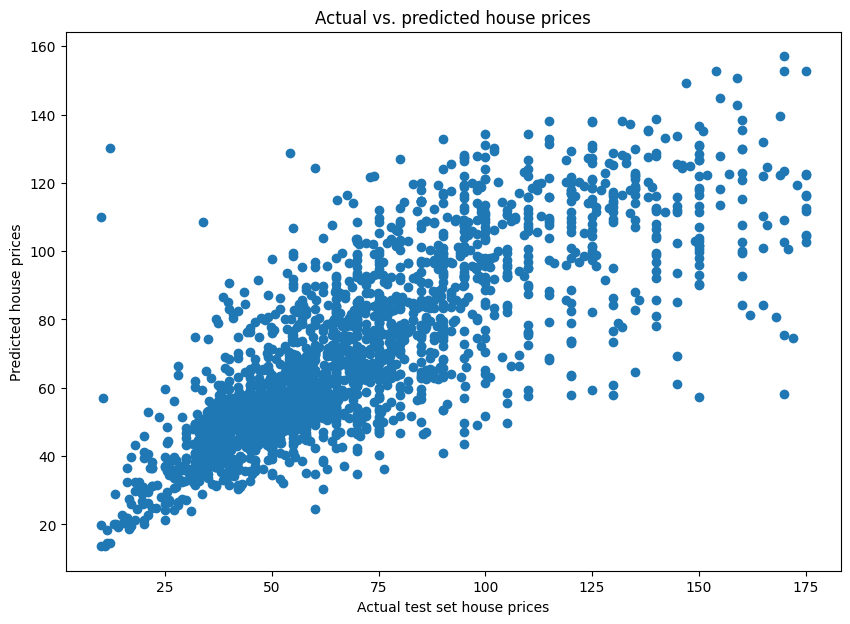

In [832]:
# Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line
plt.figure(figsize=(10,7))
plt.scatter(x=y_test, y=predictions)
plt.title("Actual vs. predicted house prices")
plt.xlabel("Actual test set house prices")
plt.ylabel("Predicted house prices")

<Axes: title={'center': 'Histogram of residuals to check for normality'}, xlabel='Residuals', ylabel='Kernel density'>

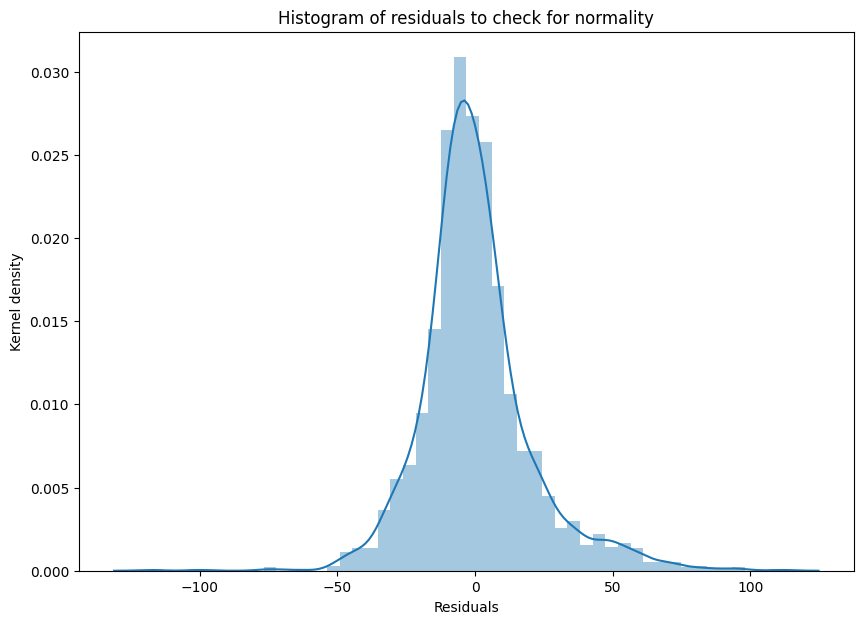

In [833]:
# Plotting histogram of the residuals i.e. predicted errors (expect a normally distributed pattern)
plt.figure(figsize=(10,7))
plt.title("Histogram of residuals to check for normality")
plt.xlabel("Residuals")
plt.ylabel("Kernel density")
sns.distplot([y_test-predictions])

Text(0, 0.5, 'Residuals')

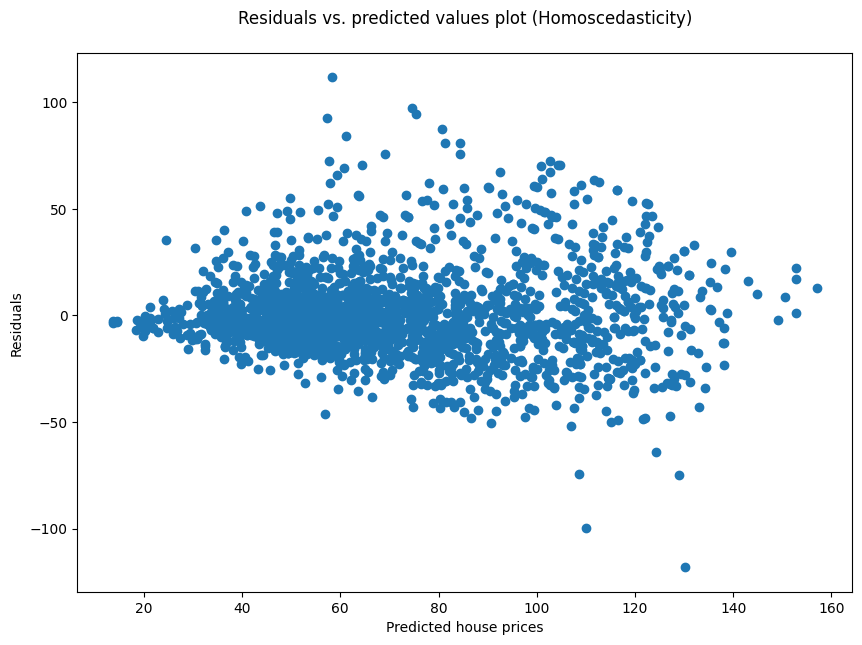

In [834]:
# Scatter plot of residuals and predicted values (Homoscedasticity)
plt.figure(figsize=(10,7))
plt.scatter(x=predictions,y=y_test-predictions)
plt.title("Residuals vs. predicted values plot (Homoscedasticity)\n")
plt.xlabel("Predicted house prices")
plt.ylabel("Residuals")

#### Evaluating the Model

In [835]:
print('R2:', round(metrics.r2_score(y_test,predictions),2))
print('MAE:', round(metrics.mean_absolute_error(y_test, predictions),2))
print('MSE:', round(metrics.mean_squared_error(y_test, predictions),2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2))

R2: 0.63
MAE: 14.1
MSE: 403.51
RMSE: 20.09


##### Insights
- R-Squared = 0.63: means the model can explain about 63% of the variation in house price data. This is a relatively good result but still needs improvement.

- Mean Absolute Error (MAE) = 14.1: on average, the model's predicted value differs by about $14.1 from the actual value.

- Mean Squared Error (MSE) = 403.51 and Root Mean Squared Error (RMSE) = 20.09: High MSE indicates the presence of some large deviations in the predicted values. RMSE is the square root of MSE, providing an idea of the average error in the same units as the house price. This value is also quite high, suggesting that the model can be improved to minimize large errors.

#### Suggested Improvements to the Model

##### Suggested
1. Collect more data: If possible, try to collect more data to get broader coverage of the different characteristics of different house types and locations.

2. Handle input variables: Check and handle outliers or missing data in variables such as total_sqft, no_rooms. Consider converting categorical variables like area_type, room_types using one-hot encoding to improve the model.

3. Select and refine features: Perform importance analysis of features and eliminate features with little information, which can help improve model performance. Test adding new features that may be useful, such as distance to the city center, surrounding amenities.

4. Model tuning: Experiment with different regression models (e.g. Ridge regression, Lasso, ElasticNet) and tweak hyperparameters to see if it is possible to improve R² and reduce MSE, RMSE.

5. Cross-validation: Use cross-validation techniques to evaluate the model more thoroughly, helping to avoid overfitting and more accurately evaluate model performance.

6. Error analysis: Analyze specific cases where the model predicts large deviations to understand the reasons and find ways to fix them.


# END.